# Metrics Investigation


In [1]:
# Add ldcpy root to system path
import sys

import astropy

sys.path.insert(0, '/Users/alex/git/ldcpy')

# Import ldcpy package
# Autoreloads package everytime the package is called, so changes to code will be reflected in the notebook if the above sys.path.insert(...) line is uncommented.
%load_ext autoreload
%autoreload 2

# suppress all of the divide by zero warnings
import warnings

warnings.filterwarnings("ignore")

import ldcpy

# display the plots in this notebook
%matplotlib inline

In [2]:
sys.path

['/Users/alex/git/ldcpy',
 '/Users/alex/git/lcr/notebooks',
 '/opt/miniconda3/envs/ldcpy_a/lib/python38.zip',
 '/opt/miniconda3/envs/ldcpy_a/lib/python3.8',
 '/opt/miniconda3/envs/ldcpy_a/lib/python3.8/lib-dynload',
 '',
 '/Users/alex/.local/lib/python3.8/site-packages',
 '/opt/miniconda3/envs/ldcpy_a/lib/python3.8/site-packages']

## Overview


This notebook demonstrates the use of ldcpy on the sample data included with
this package. It explains how to open datasets (and view metadata), display
basic statistics about the data, and create both time-series and spatial plots
of the datasets and related quantitiess. Plot examples start out with the essential
arguments, and subsequent examples explore the additional plotting options that
are available.

For information about installation, see
[these instructions](https://ldcpy.readthedocs.io/en/latest/installation.html),
and for information about usage, see the API reference
[here](https://ldcpy.readthedocs.io/en/latest/api.html#ldcpy.plot.plot).


## Loading Datasets and Viewing Metadata


The first step in comparing the data is to load the data from the files that we
are interested into a "collection" for ldcpy to use. To do this, we use
ldcpy.open_datasets(). This function requires the following three arguments:

- _varnames_ : the variable(s) of interest to combine across files (typically
  the timeseries file variable name)
- _list_of_files_ : a list of full file paths (either relative or absolute)
- _labels_ : a corresponding list of names (or labels) for each file in the
  collection

Note: This function is a wrapper for xarray.open_mfdatasets(), and any
additional key/value pairs passed in as a dictionary are used as arguments to
xarray.open_mfdatasets(). For example, specifying the chunk size ("chunks") will
be important for large data (see LargeDataGladeNotebook.ipynb for more
information and an example).

We setup three different collections of timeseries datasets in these examples:

- _col_ts_ contains daily surface temperature (TS) data (2D data) for 100 days
- _col_prect_ contains daily precipitation rate (PRECT) data (2D data) for 60 days
- _col_t_ contains monthly temperature (T) data (3D data) for 3 months

These datasets are collections of variable data from several different netCDF
files, which are given labels in the third parameter to the
ldcpy.open_datasets() function. These names/labels can be whatever you want
(e.g., "orig", "control", "bob", ...), but they should be informative because
the names will be used to select the appropriate dataset later and as part of
the plot titles.

In this example, in each dataset collection we include a file with the original
(uncompressed) data as well as additional file(s) with the same data subject to
different levels of lossy compression.

_Note: If you do not need to get the data from files (e.g., you have already
used xarray.open_dataset()), then use ldcpy.collect_datasets() instead of
ldcpy.open_datasets (see example in AWSDataNotebook.ipynb)._


In [3]:
p = '/Users/alex/git/ldcpy'

# col_ts is a collection containing TS data
col_ts = ldcpy.open_datasets(
    "cam-fv",
    ["TS"],
    [
        f"{p}/data/cam-fv/orig.TS.100days.nc",
        f"{p}/data/cam-fv/zfp1.0.TS.100days.nc",
        f"{p}/data/cam-fv/zfp1e-1.TS.100days.nc",
    ],
    ["orig", "zfpA1.0", "zfpA1e-1"],
)
# col_prect contains PRECT data
col_prect = ldcpy.open_datasets(
    "cam-fv",
    ["PRECT"],
    [
        f"{p}/data/cam-fv/orig.PRECT.60days.nc",
        f"{p}/data/cam-fv/zfp1e-7.PRECT.60days.nc",
        f"{p}/data/cam-fv/zfp1e-11.PRECT.60days.nc",
    ],
    ["orig", "zfpA1e-7", "zfpA1e-11"],
)
# col_t contains 3D T data (here we specify the chunk to be a single timeslice)
col_t = ldcpy.open_datasets(
    "cam-fv",
    ["T"],
    [
        f"{p}/data/cam-fv/cam-fv.T.3months.nc",
        f"{p}/data/cam-fv/c.fpzip.cam-fv.T.3months.nc",
    ],
    ["orig", "comp"],
    chunks={"time": 1},
)

dataset size in GB 0.07

dataset size in GB 0.04

dataset size in GB 0.04



In [6]:
ds = col_ts.isel(time=0)

# Compression Comparison (Visuals and Metrics)


In [28]:
# without weighted means
ldcpy.compare_stats(ds, "TS", ["orig", "zfpA1.0", "zfpA1e-1"], significant_digits=6, weighted=False)

Warning - this data set has a time dimension - examining slice 0 only...


orig   zfpA1.0  zfpA1e-1
mean                           274.714   274.708   274.713
variance                       534.006   533.681   533.985
standard deviation             23.1088   23.1017   23.1083
min value                      216.741   216.816   216.747
max value                      315.584    315.57   315.576
probability positive                 1         1         1
number of zeros                      0         0         0
spatial autocorr - latitude   0.993918  0.993911  0.993918
spatial autocorr - longitude  0.996801  0.996791  0.996801
entropy estimate              0.414723  0.247491  0.347534

zfpA1.0     zfpA1e-1
max abs diff                           0.405884    0.0229187
min abs diff                                  0            0
mean abs diff                         0.0585202   0.00422603
mean squared diff                   3.32617e-05  1.51646e-07
root mean squared diff                 0.075273   0.00533574
normalized root mean squared diff   0.000761543  5.39821e-05
normalized max pointwise error       0.00410636   0.00023187
pearson correlation coefficient        0.999995            1
ks p-value                                    1            1
spatial relative error(% > 0.0001)       68.958            0
spatial relative error (% > 0.001)      0.18627            0
spatial relative error (% > 0.05)             0            0
spatial relative error (% > 0.01)             0            0
max spatial relative error           0.00147397  8.11948e-05
data SSIM                              0.981813     0.998227
file size ratio                            1.87         1.28

274.7137027669836
274.707935474537
274.7133133499711


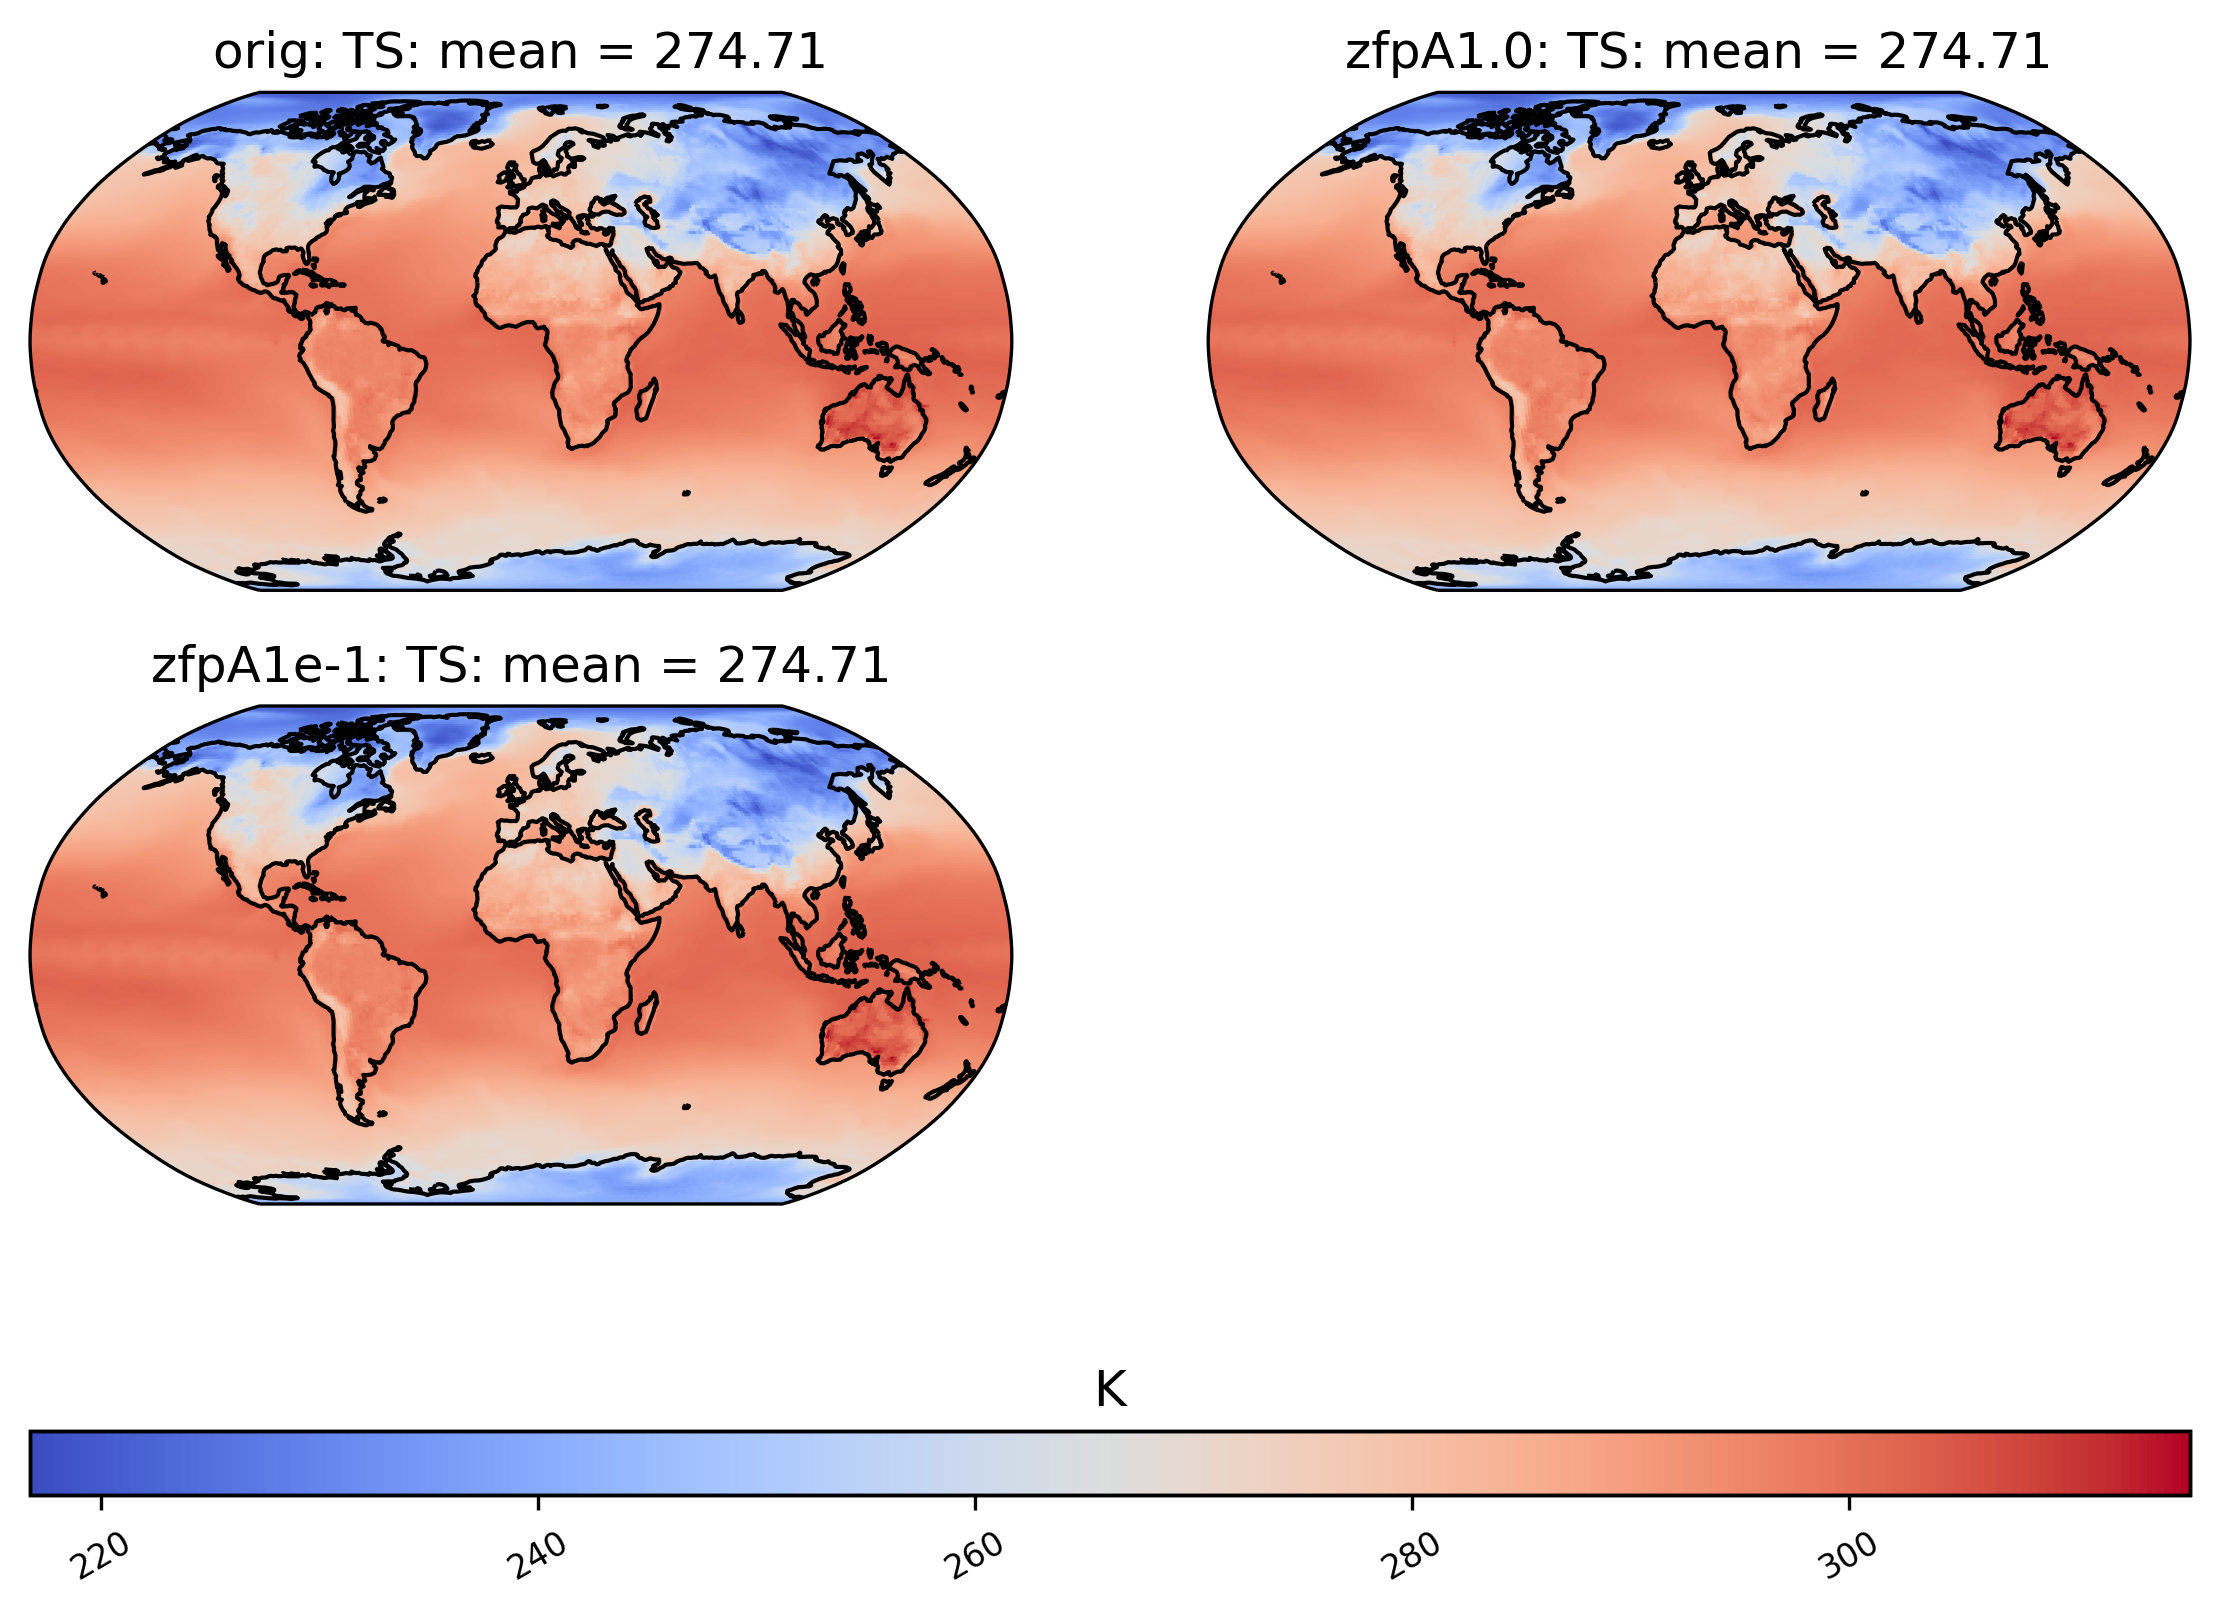

In [7]:
ds = ds.expand_dims(dim="time")
ldcpy.plot(ds, "TS", sets=["orig", "zfpA1.0", "zfpA1e-1"], calc="mean", weighted=False)

# Noise Comparison (Visuals and Metrics)


In [7]:
import numpy as np
scale = np.logspace(-4, -1, num=18)

noise1 = np.random.normal(0, ds.sel(collection="orig").std().compute()["TS"] * scale[0], [192,288])
noise_1 = ds.sel(collection="orig") + noise1
#noise_1 = noise_1.expand_dims(dim="time")

noise2 = np.random.normal(0, ds.sel(collection="orig").std().compute()["TS"] * scale[1], [192,288])
noise_2 = ds.sel(collection="orig") + noise2
#noise_2 = noise_2.expand_dims(dim="time")

noise3 = np.random.normal(0, ds.sel(collection="orig").std().compute()["TS"] * scale[2], [192,288])
noise_3 = ds.sel(collection="orig") + noise3
#noise_3 = noise_3.expand_dims(dim="time")

noise4 = np.random.normal(0, ds.sel(collection="orig").std().compute()["TS"] * scale[3], [192,288])
noise_4 = ds.sel(collection="orig") + noise4
#noise_4 = noise_4.expand_dims(dim="time")

noise5 = np.random.normal(0, ds.sel(collection="orig").std().compute()["TS"] * scale[4], [192,288])
noise_5 = ds.sel(collection="orig") + noise5
#noise_5 = noise_5.expand_dims(dim="time")

noise6 = np.random.normal(0, ds.sel(collection="orig").std().compute()["TS"] * scale[5], [192,288])
noise_6 = ds.sel(collection="orig") + noise6
#noise_6 = noise_6.expand_dims(dim="time")

noise7 = np.random.normal(0, ds.sel(collection="orig").std().compute()["TS"] * scale[6], [192,288])
noise_7 = ds.sel(collection="orig") + noise7
#noise_7 = noise_7.expand_dims(dim="time")

noise8 = np.random.normal(0, ds.sel(collection="orig").std().compute()["TS"] * scale[7], [192,288])
noise_8 = ds.sel(collection="orig") + noise8
#noise_8 = noise_8.expand_dims(dim="time")

noise9 = np.random.normal(0, ds.sel(collection="orig").std().compute()["TS"] * scale[8], [192,288])
noise_9 = ds.sel(collection="orig") + noise9
#noise_9 = noise_9.expand_dims(dim="time")

noise_ds = ldcpy.collect_datasets("cam-fv", 
                                  ["TS"], 
                                  [ds.sel(collection="orig"), noise_1, noise_2, noise_3, noise_4, noise_5, noise_6, noise_7, noise_8, noise_9],
                                  ["orig", "noise_1", "noise_2", "noise_3", "noise_4", "noise_5", "noise_6", "noise_7", "noise_8", "noise_9"])
noise_ds.attrs["file_size"] = None

dataset size in GB 0.00



In [8]:
# without weighted means
ldcpy.compare_stats(noise_ds, "TS", ["orig", "noise_1", "noise_2",
                                     "noise_3", "noise_4", "noise_5",
                                     "noise_6", "noise_7", "noise_8",
                                     "noise_9"], significant_digits=6, weighted=False)

Warning - this data set has a time dimension - examining slice 0 only...


KeyboardInterrupt: 

In [ ]:
# without weighted means
ldcpy.plot(noise_ds, "TS", sets=["orig", "noise_1", "noise_2",
                                     "noise_3", "noise_4", "noise_5",
                                     "noise_6", "noise_7", "noise_8",
                                     "noise_9"], calc="mean", weighted=False)

In [17]:
# da = ds.sel(collection="orig")#.expand_dims(dim="time")
# reverse_lat_da = da
# reverse_lat_da["lat"] = da.lat[::-1]

# reverse_lon_da = da
# reverse_lon_da["lon"] = da.lon[::-1]

# reverse_lat_lon_da = da
# reverse_lat_lon_da["lon"] = da.lon[::-1]
# reverse_lat_lon_da["lat"] = da.lat[::-1]

# reverse_ds = ldcpy.collect_datasets("cam-fv", ["TS"],
#                        [da, reverse_lat_da, reverse_lon_da, reverse_lat_lon_da],
#                                   ["orig", "reverse_lat", "reverse_lon", "reverse_lat_lon"])
# reverse_ds.attrs["file_size"] = None

# Reversed Comparison (Visuals and Metrics)


In [19]:
da = ds.sel(collection="orig")#.expand_dims(dim="time")
reverse_lat_da = da.copy()
reverse_lat_da["lat"] = da.lat[::-1]


reverse_ds = ldcpy.collect_datasets("cam-fv", ["TS"],
                       [da, reverse_lat_da],
                                  ["orig", "reverse_lat"])
reverse_ds.attrs["file_size"] = None

dataset size in GB 0.00



In [20]:
# without weighted means
ldcpy.compare_stats(reverse_ds, "TS", ["orig", "reverse_lat"], significant_digits=6, weighted=False)

Warning - this data set has a time dimension - examining slice 0 only...


orig reverse_lat
mean                           274.714     274.714
variance                       534.006     534.006
standard deviation             23.1088     23.1088
min value                      216.741     216.741
max value                      315.584     315.584
probability positive                 1           1
number of zeros                      0           0
spatial autocorr - latitude   0.993918    0.993918
spatial autocorr - longitude  0.996801    0.996801
entropy estimate              0.414723    0.413649

reverse_lat
max abs diff                            64.0742
min abs diff                        3.05176e-05
mean abs diff                           13.7017
mean squared diff                             0
root mean squared diff                  19.2959
normalized root mean squared diff      0.195218
normalized max pointwise error         0.648244
pearson correlation coefficient        0.651378
ks p-value                                    1
spatial relative error(% > 0.0001)      99.5407
max spatial relative error             0.221123
data SSIM                              0.186976

274.7137027669836
274.7137027669836


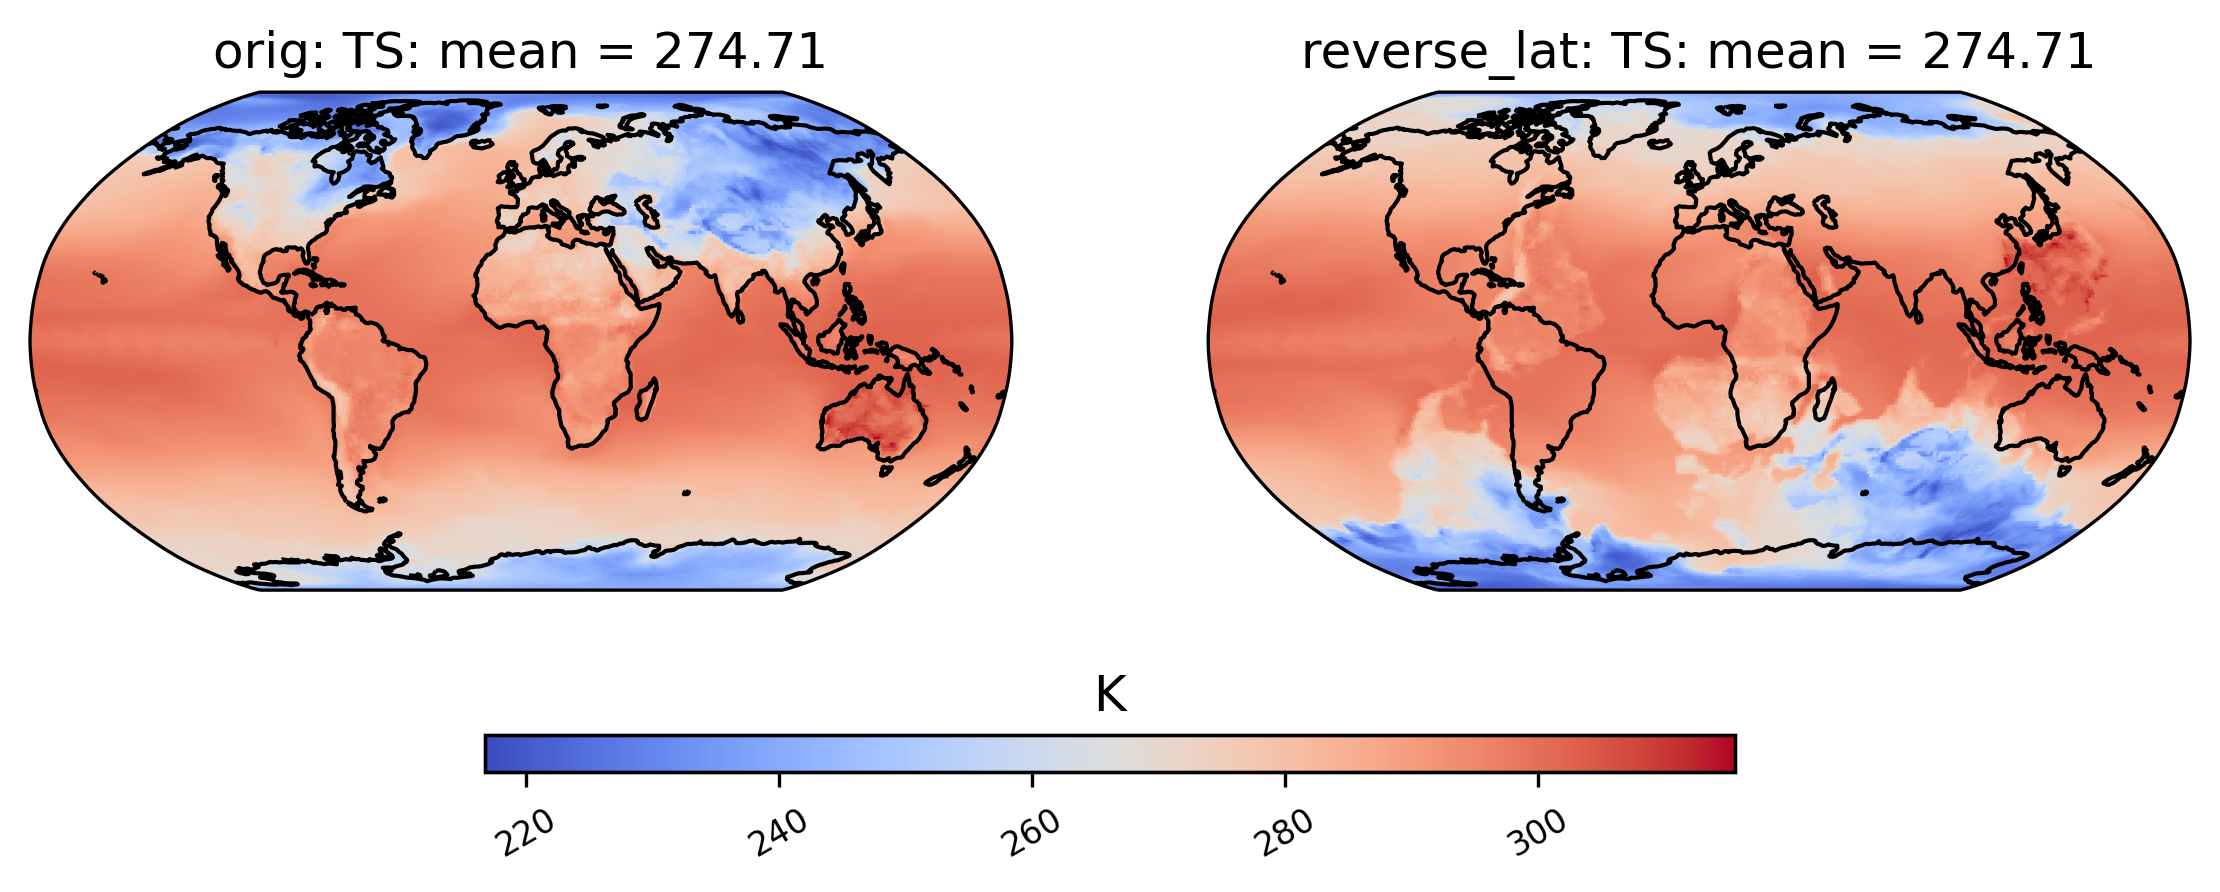

In [20]:
ldcpy.plot(reverse_ds, "TS", sets=["orig", "reverse_lat"], calc="mean", weighted=False)

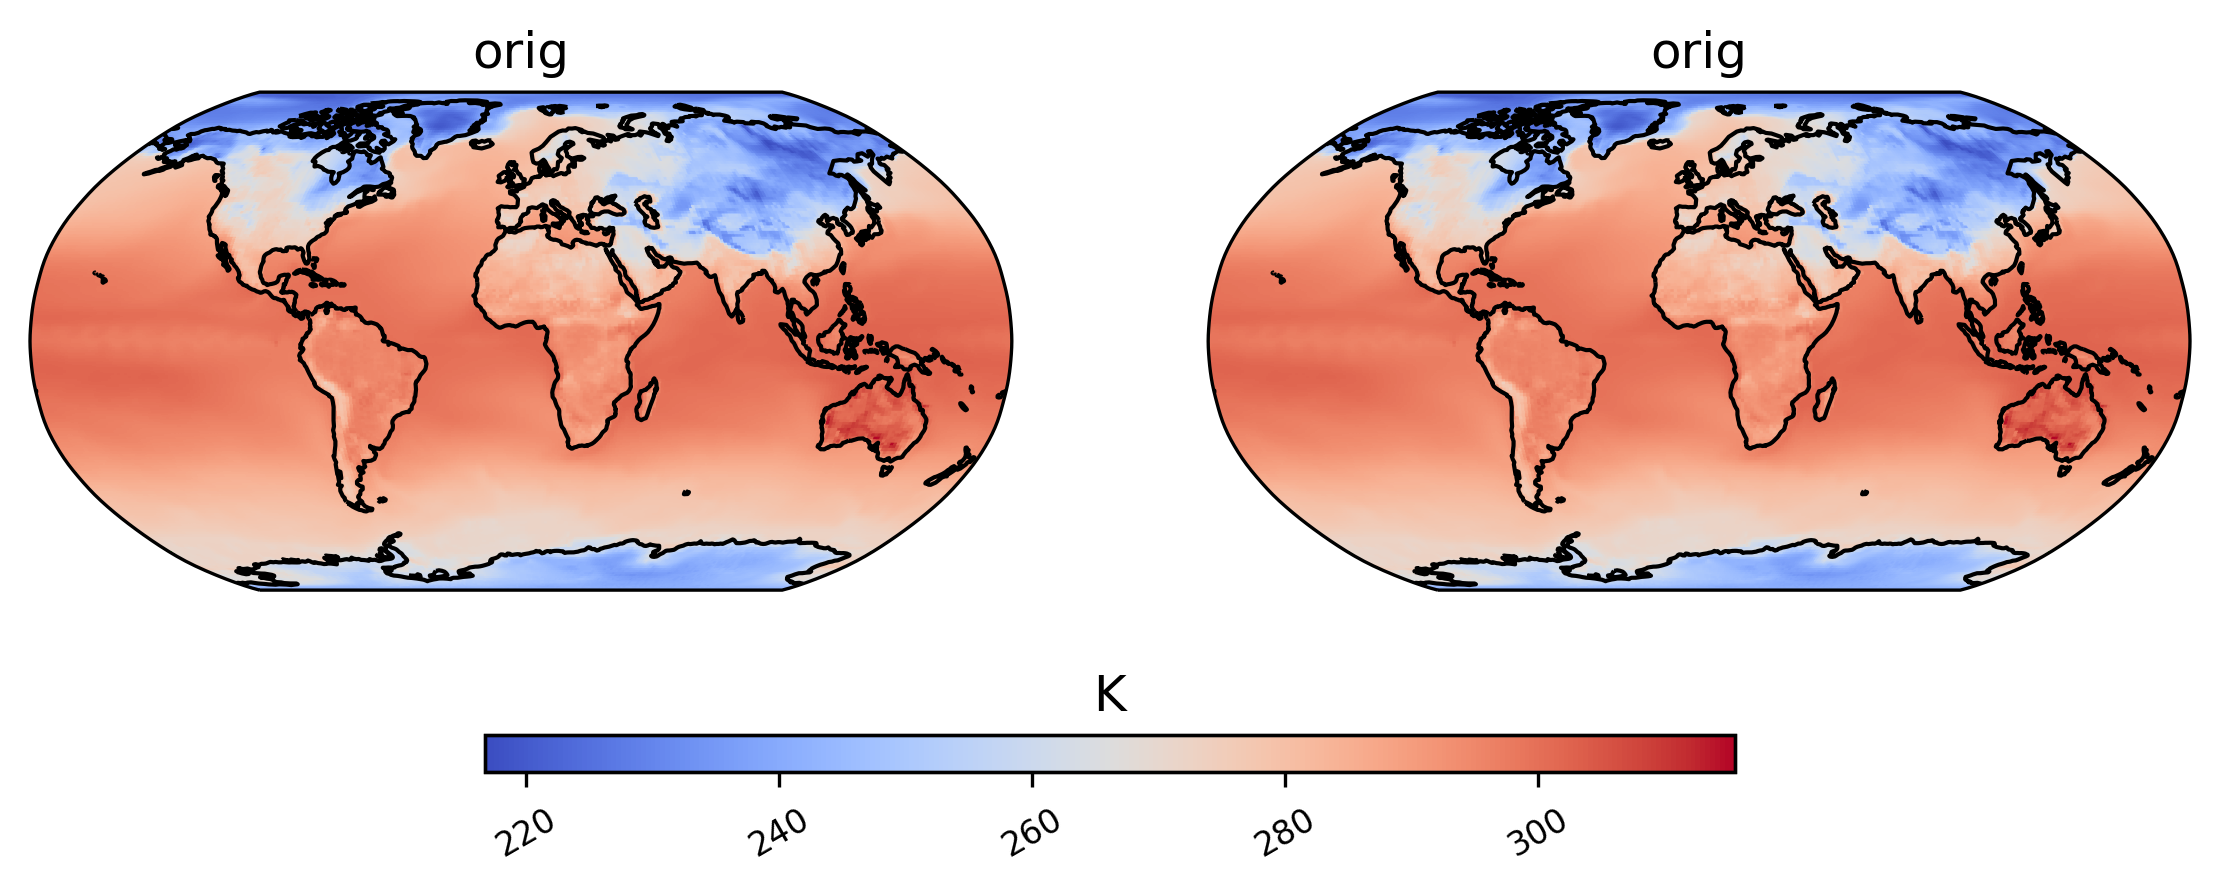

In [22]:
ldcpy.plot(reverse_ds, "TS", sets=["orig", "orig"], calc="mean", weighted=False, short_title=True)

# Single Point Altered Comparison (Visuals and Metrics)


In [8]:
import xarray as xr
import numpy as np
import dask
da = ds.sel(collection="orig")["TS"]

point_altered_da = da.copy().load()
print(point_altered_da[0,0,0].values)
point_altered_da[0,0,0] = 1000000


point_altered_da3 = da.copy().load()
point_altered_da3[0,0,0] = 292.21022


point_altered_da2 = da.copy().load()
point_altered_da2[0,10,10] = 1000000


242.21022


In [13]:
da = ds.sel(collection="orig")
altered_ds = ldcpy.collect_datasets("cam-fv", ["TS"],
                       [da, point_altered_da.to_dataset(), point_altered_da2.to_dataset(),
                       point_altered_da3.to_dataset()],
                                  ["original data", "altered", "altered data", "altered3"])
altered_ds.attrs["file_size"] = None

dataset size in GB 0.00



In [13]:
# without weighted means
ldcpy.compare_stats(altered_ds, "TS", ["orig", "altered", "altered2", "altered3"], significant_digits=6, weighted=False)

Warning - this data set has a time dimension - examining slice 0 only...


orig       altered      altered2  altered3
mean                           274.714       292.794       292.794   274.715
variance                       534.006   1.80748e+07   1.80748e+07   533.992
standard deviation             23.1088       4251.48       4251.48   23.1085
min value                      216.741       216.741       216.741   216.741
max value                      315.584         1e+06         1e+06   315.584
probability positive                 1             1             1         1
number of zeros                      0             0             0         0
spatial autocorr - latitude   0.993918  -0.000755165  -4.38833e-05  0.993874
spatial autocorr - longitude  0.996801  -5.17667e-05  -4.24301e-05  0.996719
entropy estimate              0.414723      0.414743      0.414734  0.414741

altered     altered2     altered3
max abs diff                              999758       999752           50
min abs diff                                   0            0            0
mean abs diff                            18.0801        18.08  0.000904224
mean squared diff                         326.89      326.887  8.17622e-07
root mean squared diff                   4251.56      4251.53     0.212629
normalized root mean squared diff        43.0133      43.0131   0.00215119
normalized max pointwise error                 0            0            0
pearson correlation coefficient     -0.000546195  0.000505457     0.999958
ks p-value                                     1            1            1
spatial relative error(% > 0.0001)    0.00180845   0.00180845   0.00180845
max spatial relative error                     0            0            0
data SSIM                                0.99998      0.99761            1

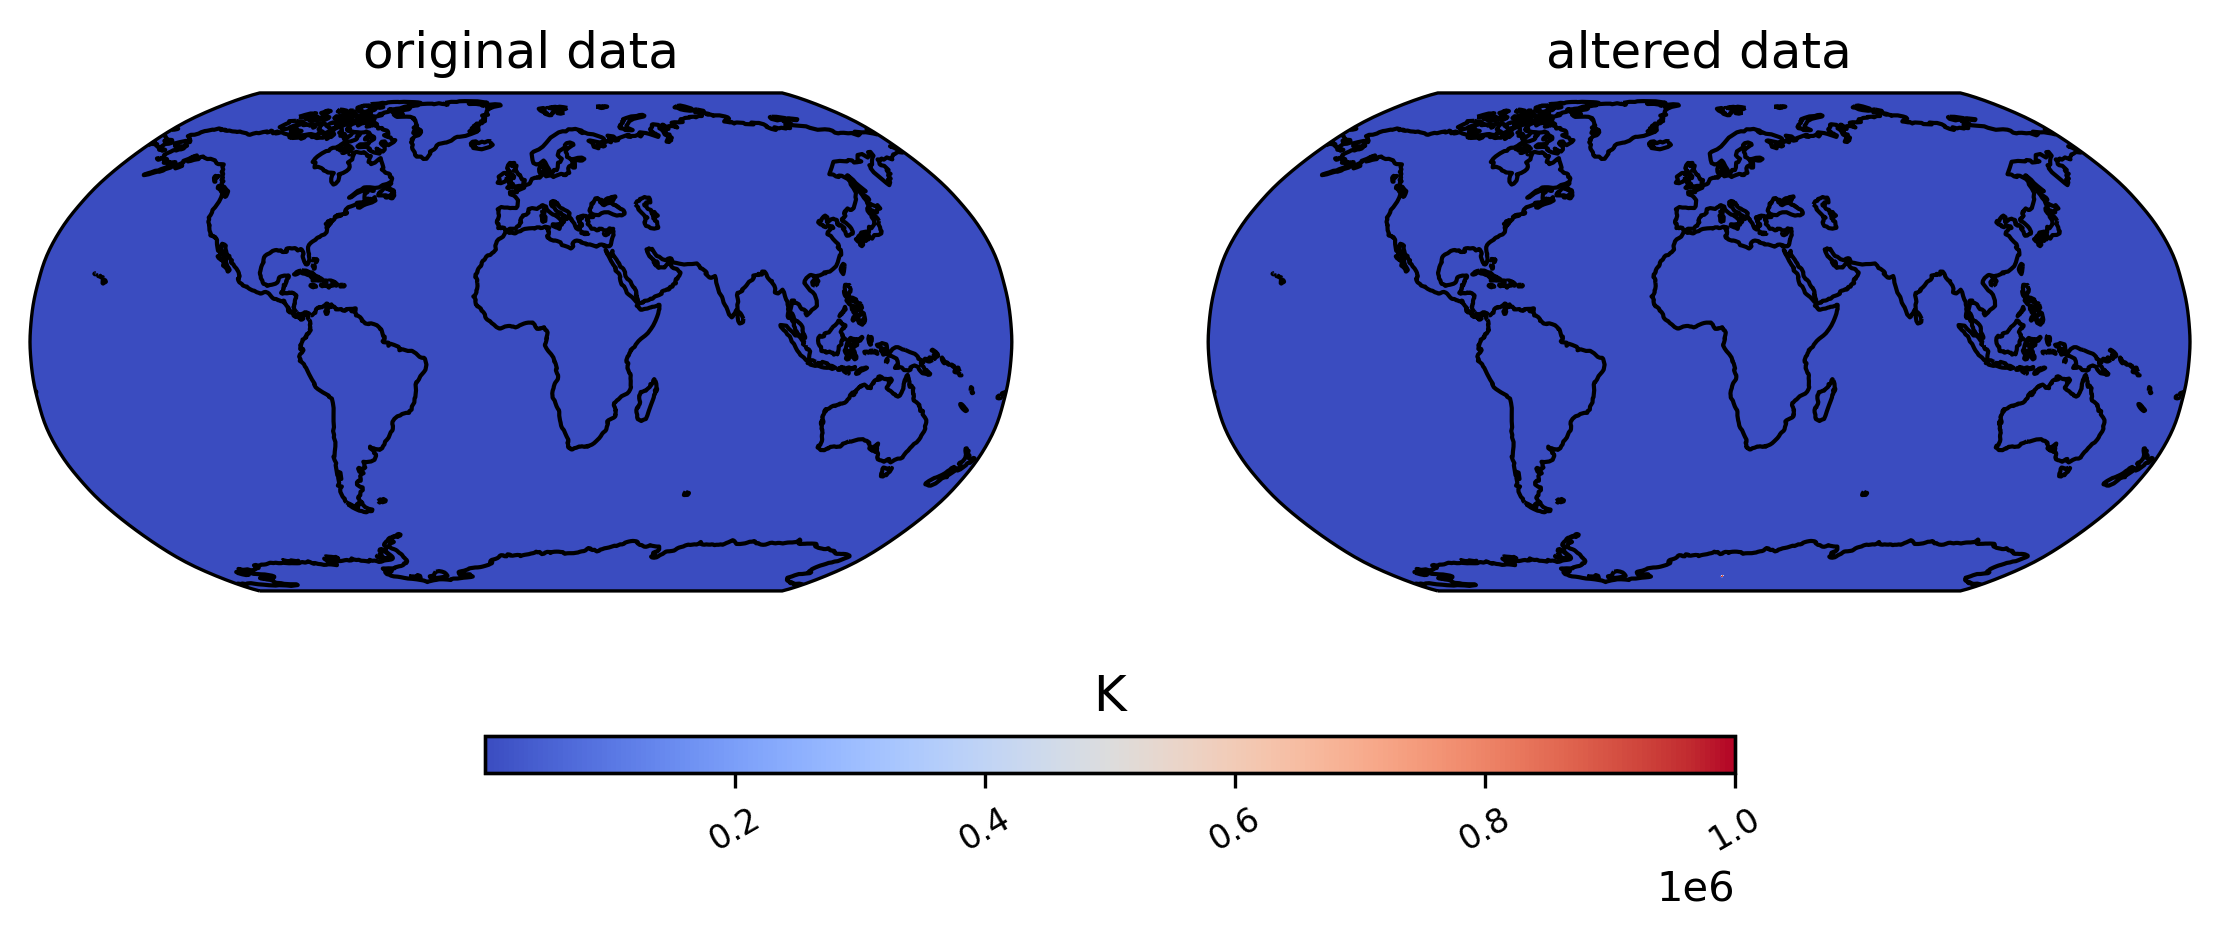

In [14]:
ldcpy.plot(altered_ds, "TS", sets=["original data", "altered data"], calc="mean", weighted=False, short_title=True)





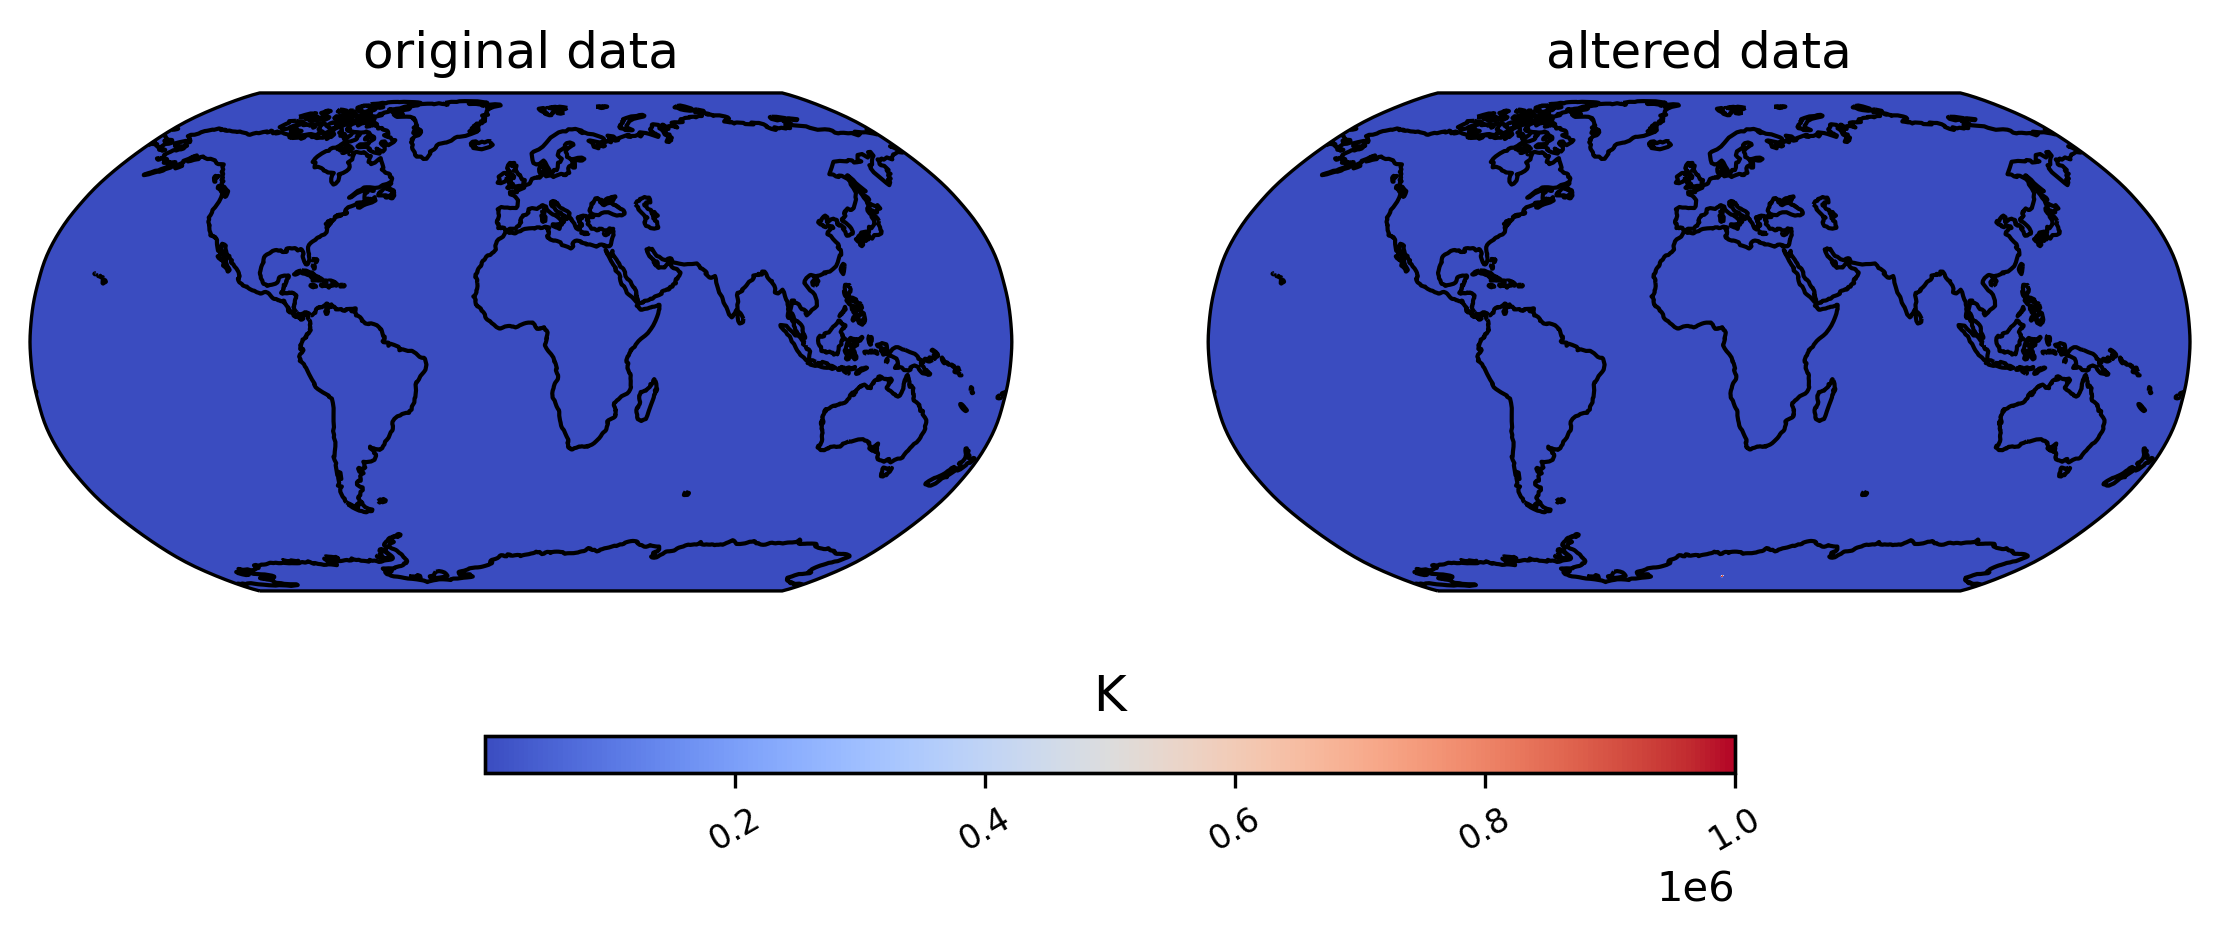

In [15]:
ldcpy.plot(altered_ds, "TS", sets=["original data", "altered data"], calc="mean", weighted=False, short_title=True)


Text(0, 0.5, 'Data Degrees (K), Altered')

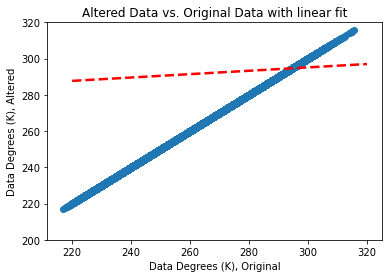

In [60]:
import matplotlib.pyplot as plt
d1 = altered_ds.sel(collection="original data").to_array().values.ravel()
d2 = altered_ds.sel(collection="altered data").to_array().values.ravel()



#coef = np.polyfit(d1,d2,1)
#poly1d_fn = np.poly1d(coef) 
#plt.plot(d1,d2, 'o', d1, poly1d_fn(d2), '--r')

#plt.scatter(d1, d2)
b, a = np.polyfit(d1, d2, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(220, 320, num=100)
plt.plot(d1,d2, "o", xseq, a + b * xseq,'--r', lw=2.5);
plt.ylim([200, 320])
plt.title("Altered Data vs. Original Data with linear fit")
plt.xlabel("Data Degrees (K), Original")
plt.ylabel("Data Degrees (K), Altered")


Text(0, 0.5, 'Degrees (K), Reconstructed')

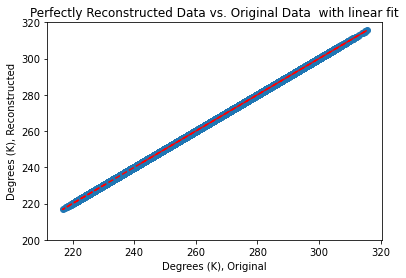

In [62]:
coef = np.polyfit(d1,d1,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(d1,d1, 'o', d1, poly1d_fn(d1), '--r')
plt.ylim([200, 320])
plt.title("Perfectly Reconstructed Data vs. Original Data  with linear fit")
plt.xlabel("Degrees (K), Original")
plt.ylabel("Degrees (K), Reconstructed")

274.7137027669836


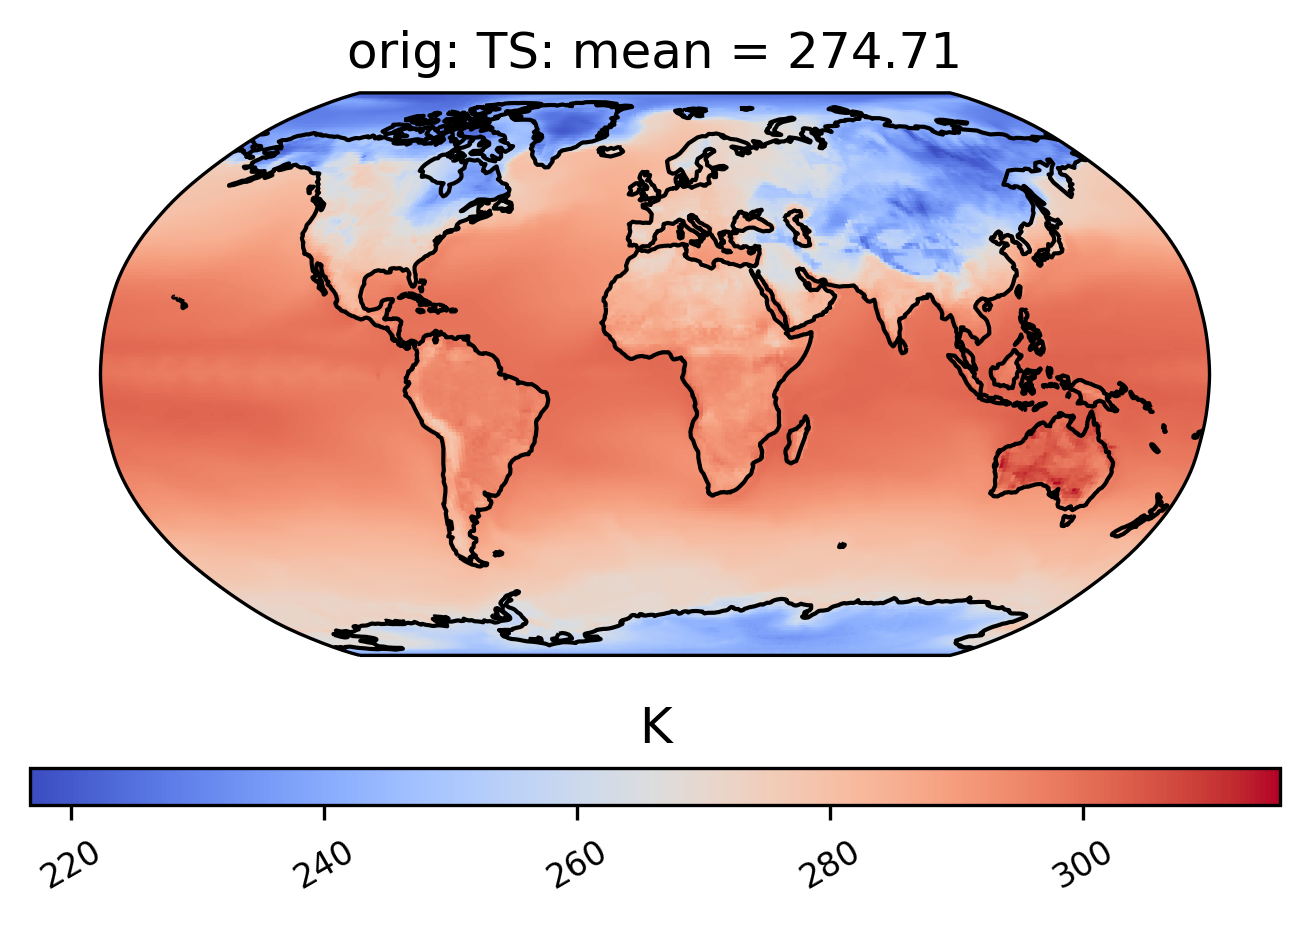

In [15]:
ldcpy.plot(altered_ds, "TS", sets=["orig"], calc="mean", weighted=False)

274.7137027669836
292.79370991775284


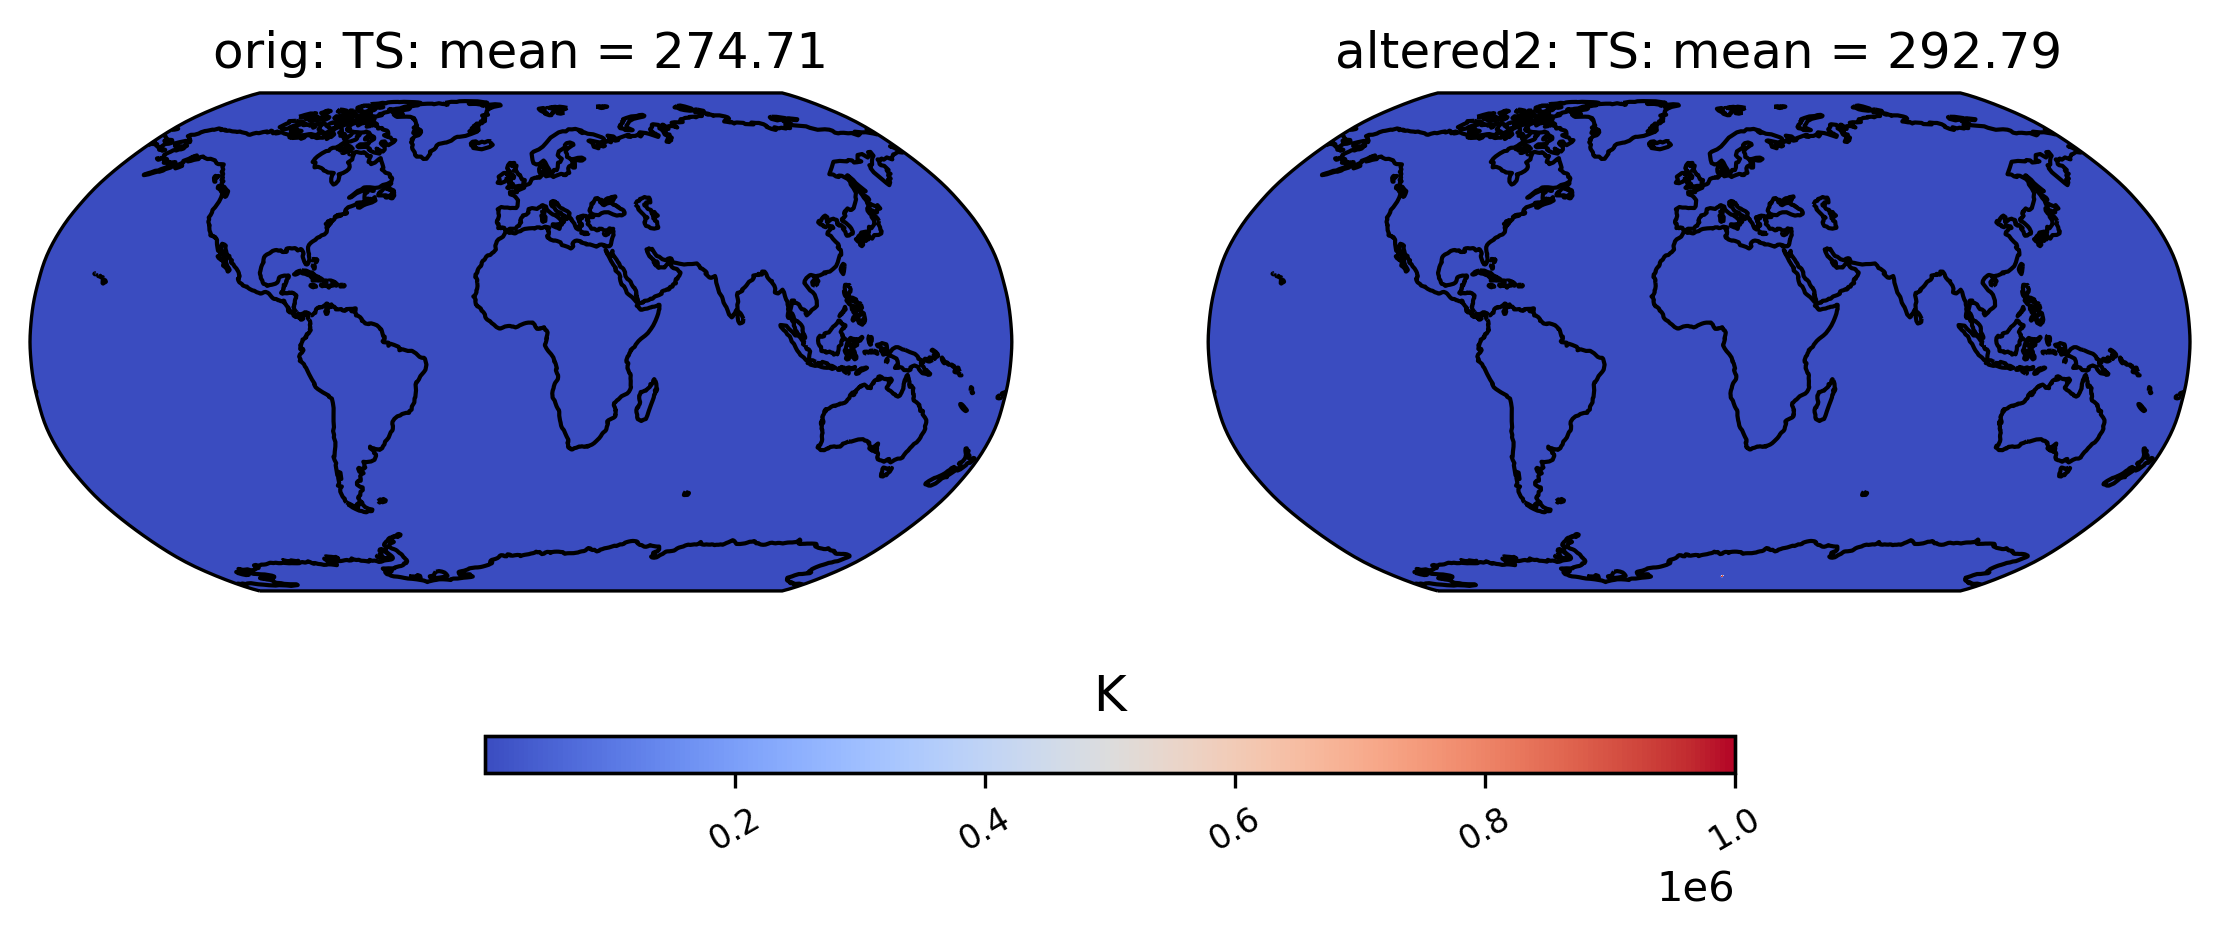

In [17]:
ldcpy.plot(altered_ds, "TS", sets=["orig", "altered2"], calc="mean", weighted=False)

292.79370991775284


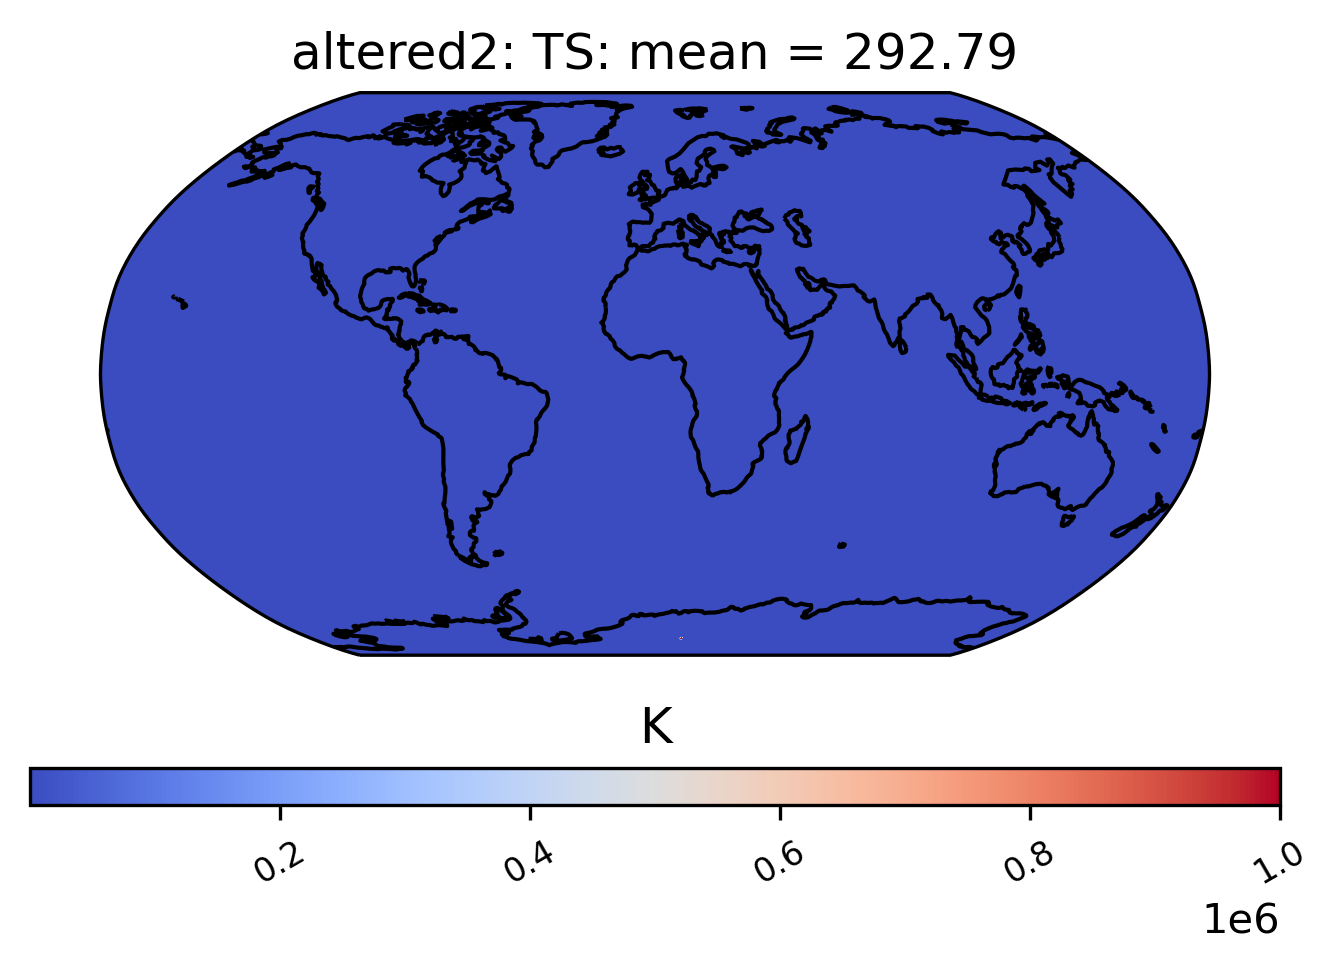

In [16]:
ldcpy.plot(altered_ds, "TS", sets=["altered2"], calc="mean", weighted=False)

# Small Addition Comparison (Visuals and Metrics)


dataset size in GB 0.00

Warning - this data set has a time dimension - examining slice 0 only...


orig   altered  altered2
mean                           274.714   275.714   274.729
variance                       534.006   534.006   534.006
standard deviation             23.1088   23.1088   23.1088
min value                      216.741   217.741   216.757
max value                      315.584   316.584     315.6
probability positive                 1         1         1
number of zeros                      0         0         0
spatial autocorr - latitude   0.993918  0.993918  0.993918
spatial autocorr - longitude  0.996801  0.996801  0.996801
entropy estimate              0.414723  0.414526  0.414714

altered      altered2
max abs diff                            1.00002     0.0157928
min abs diff                           0.999985     0.0157776
mean abs diff                                 1     0.0157776
mean squared diff                             1   0.000248932
root mean squared diff                        1     0.0157776
normalized root mean squared diff     0.0101171   0.000159623
normalized max pointwise error        0.0101169   0.000159623
pearson correlation coefficient               1             1
ks p-value                          2.50962e-42             1
spatial relative error(% > 0.0001)          100             0
max spatial relative error          -0.00316873  -4.99949e-05
data SSIM                              0.960233      0.993734

274.7137027669836
275.7137027672595
274.729480355978


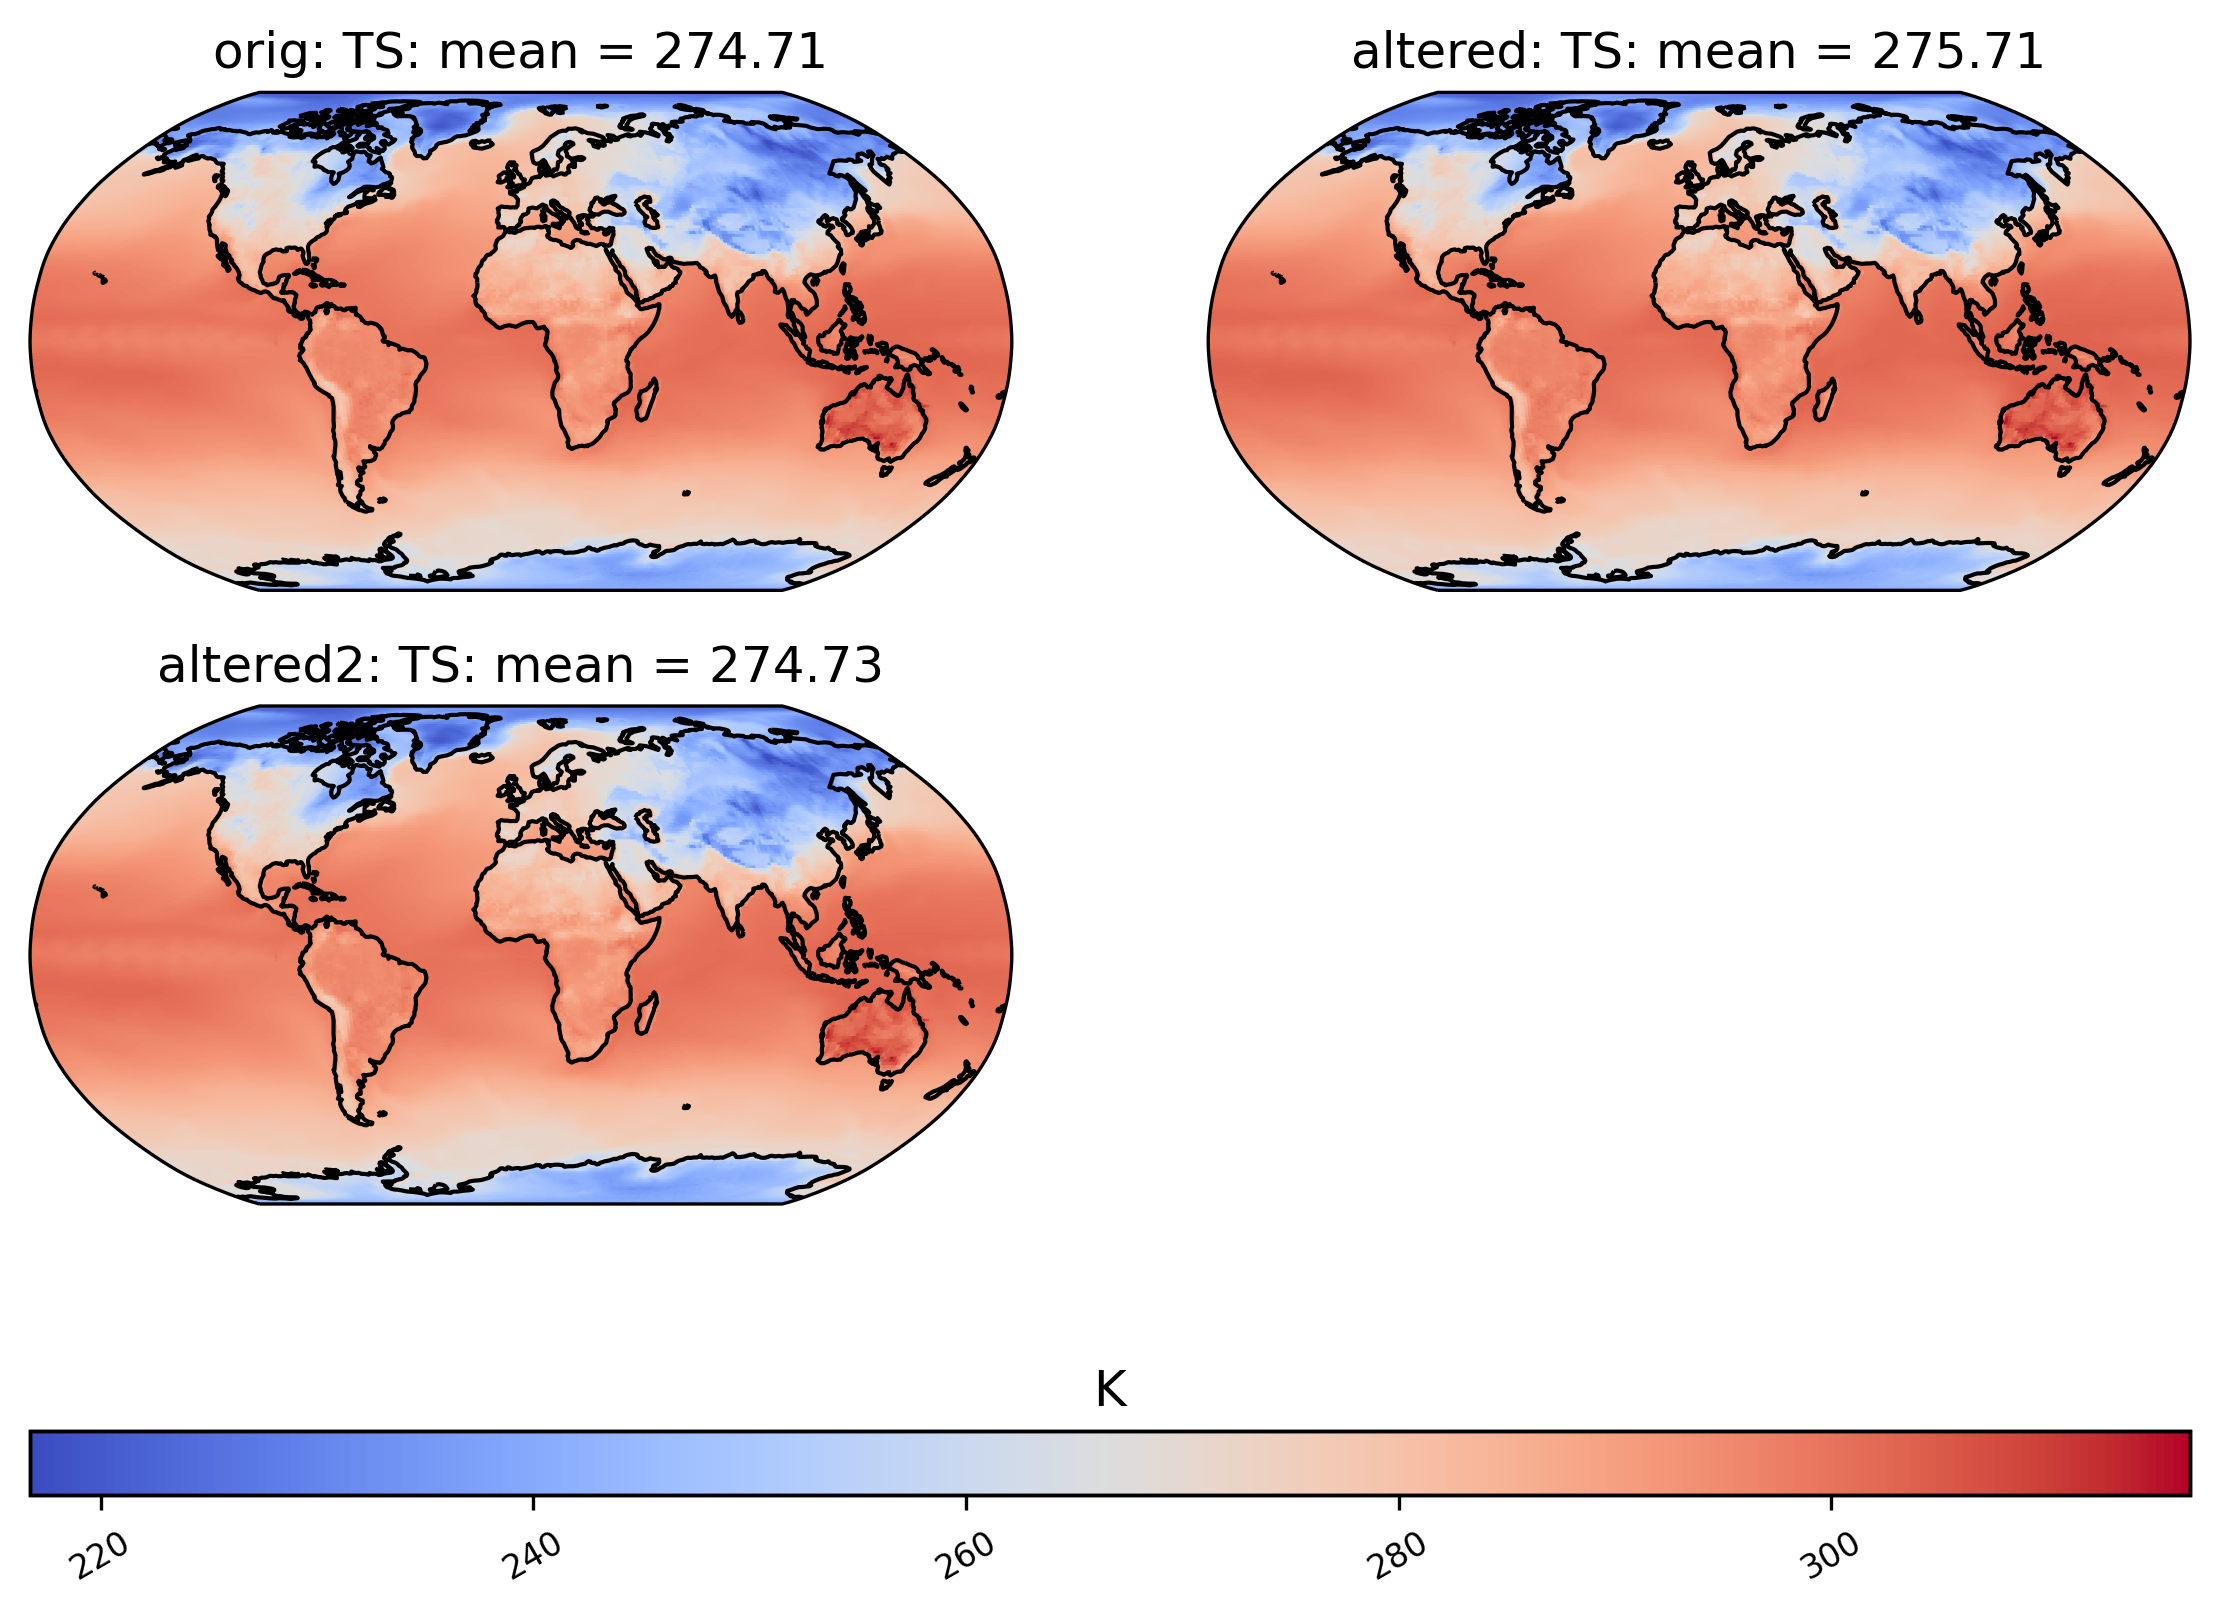

In [226]:
import xarray as xr
import numpy as np
import dask
da = ds.sel(collection="orig")["TS"]

point_altered_da = da.copy().load()
point_altered_da[:,:,:] = point_altered_da[:,:,:] + 1


point_altered_da2 = da.copy().load()
point_altered_da2[:,:,:] = point_altered_da2[:,:,:] + (np.max(point_altered_da2[:,:,:]) * 0.00005)

da = ds.sel(collection="orig")
altered_ds = ldcpy.collect_datasets("cam-fv", ["TS"],
                       [da, point_altered_da.to_dataset(), point_altered_da2.to_dataset()],
                                  ["orig", "altered", "altered2"])
altered_ds.attrs["file_size"] = None

# without weighted means
ldcpy.compare_stats(altered_ds, "TS", ["orig", "altered", "altered2"], significant_digits=6, weighted=False)

ldcpy.plot(altered_ds, "TS", sets=["orig", "altered", "altered2"], calc="mean", weighted=False)

# Small Region Altered Comparison (Visuals and Metrics)


In [23]:
import xarray as xr
import numpy as np
import dask
da = ds.sel(collection="orig")["TS"]

point_altered_da = da.copy().load()
point_altered_da[:,20:100:,20:60] = point_altered_da[:,20:100:,20:60] + (point_altered_da[:,20:100:,20:60] * .00005)


point_altered_da2 = da.copy().load()
point_altered_da2[:,20:100:,20:60] = point_altered_da2[:,20:100:,20:60] + (point_altered_da2[:,20:100:,20:60] * .00011)



point_altered_da3 = da.copy().load()
point_altered_da3[:,20:100:,20:60] = point_altered_da3[:,20:100:,20:60] + (point_altered_da3[:,20:100:,20:60] * .0002)


point_altered_da4 = da.copy().load()
point_altered_da4[:,20:100:,20:60] = point_altered_da4[:,20:100:,20:60] + (point_altered_da4[:,20:100:,20:60] * 1)


point_altered_da5 = da.copy().load()
point_altered_da5[:,30:70,250:287] = point_altered_da5[:,30:70,250:287] + (point_altered_da5[:,30:70,250:287] * .00011)
point_altered_da5[:,35:70,50:90] = point_altered_da5[:,35:70,50:90] + (point_altered_da5[:,35:70,50:90] * .00011)

point_altered_da6 = da.copy().load()
point_altered_da6[:,30:70,250:287] = point_altered_da6[:,30:70,250:287] + (point_altered_da6[:,30:70,250:287] * 1)
point_altered_da6[:,35:70,50:90] = point_altered_da6[:,35:70,50:90] + (point_altered_da6[:,35:70,50:90] * 1)


da = ds.sel(collection="orig")
altered_ds = ldcpy.collect_datasets("cam-fv", ["TS"],
                       [da, point_altered_da.to_dataset(), point_altered_da2.to_dataset(),
                        point_altered_da3.to_dataset(), point_altered_da4.to_dataset(), point_altered_da5.to_dataset(),
                       point_altered_da6.to_dataset()],
                                  ["orig", "altered", "altered2", "altered3", "altered4", "altered5", "altered6"])
altered_ds.attrs["file_size"] = None


dataset size in GB 0.00



Warning - this data set has a time dimension - examining slice 0 only...


orig  altered5
mean                           274.714   274.715
variance                       534.006   534.041
standard deviation             23.1088   23.1095
min value                      216.741   216.741
max value                      315.584   315.584
probability positive                 1         1
number of zeros                      0         0
spatial autocorr - latitude   0.993918  0.993918
spatial autocorr - longitude  0.996801  0.996801
entropy estimate              0.414723  0.414759

altered5
max abs diff                          0.0328064
min abs diff                                  0
mean abs diff                        0.00163505
mean squared diff                   2.67338e-06
root mean squared diff               0.00716677
normalized root mean squared diff   7.25068e-05
normalized max pointwise error                0
pearson correlation coefficient               1
ks p-value                                    1
spatial relative error(% > 0.0001)      5.20833
spatial relative error (% > 0.001)            0
spatial relative error (% > 0.01)             0
max spatial relative error                    0
data SSIM                              0.999514

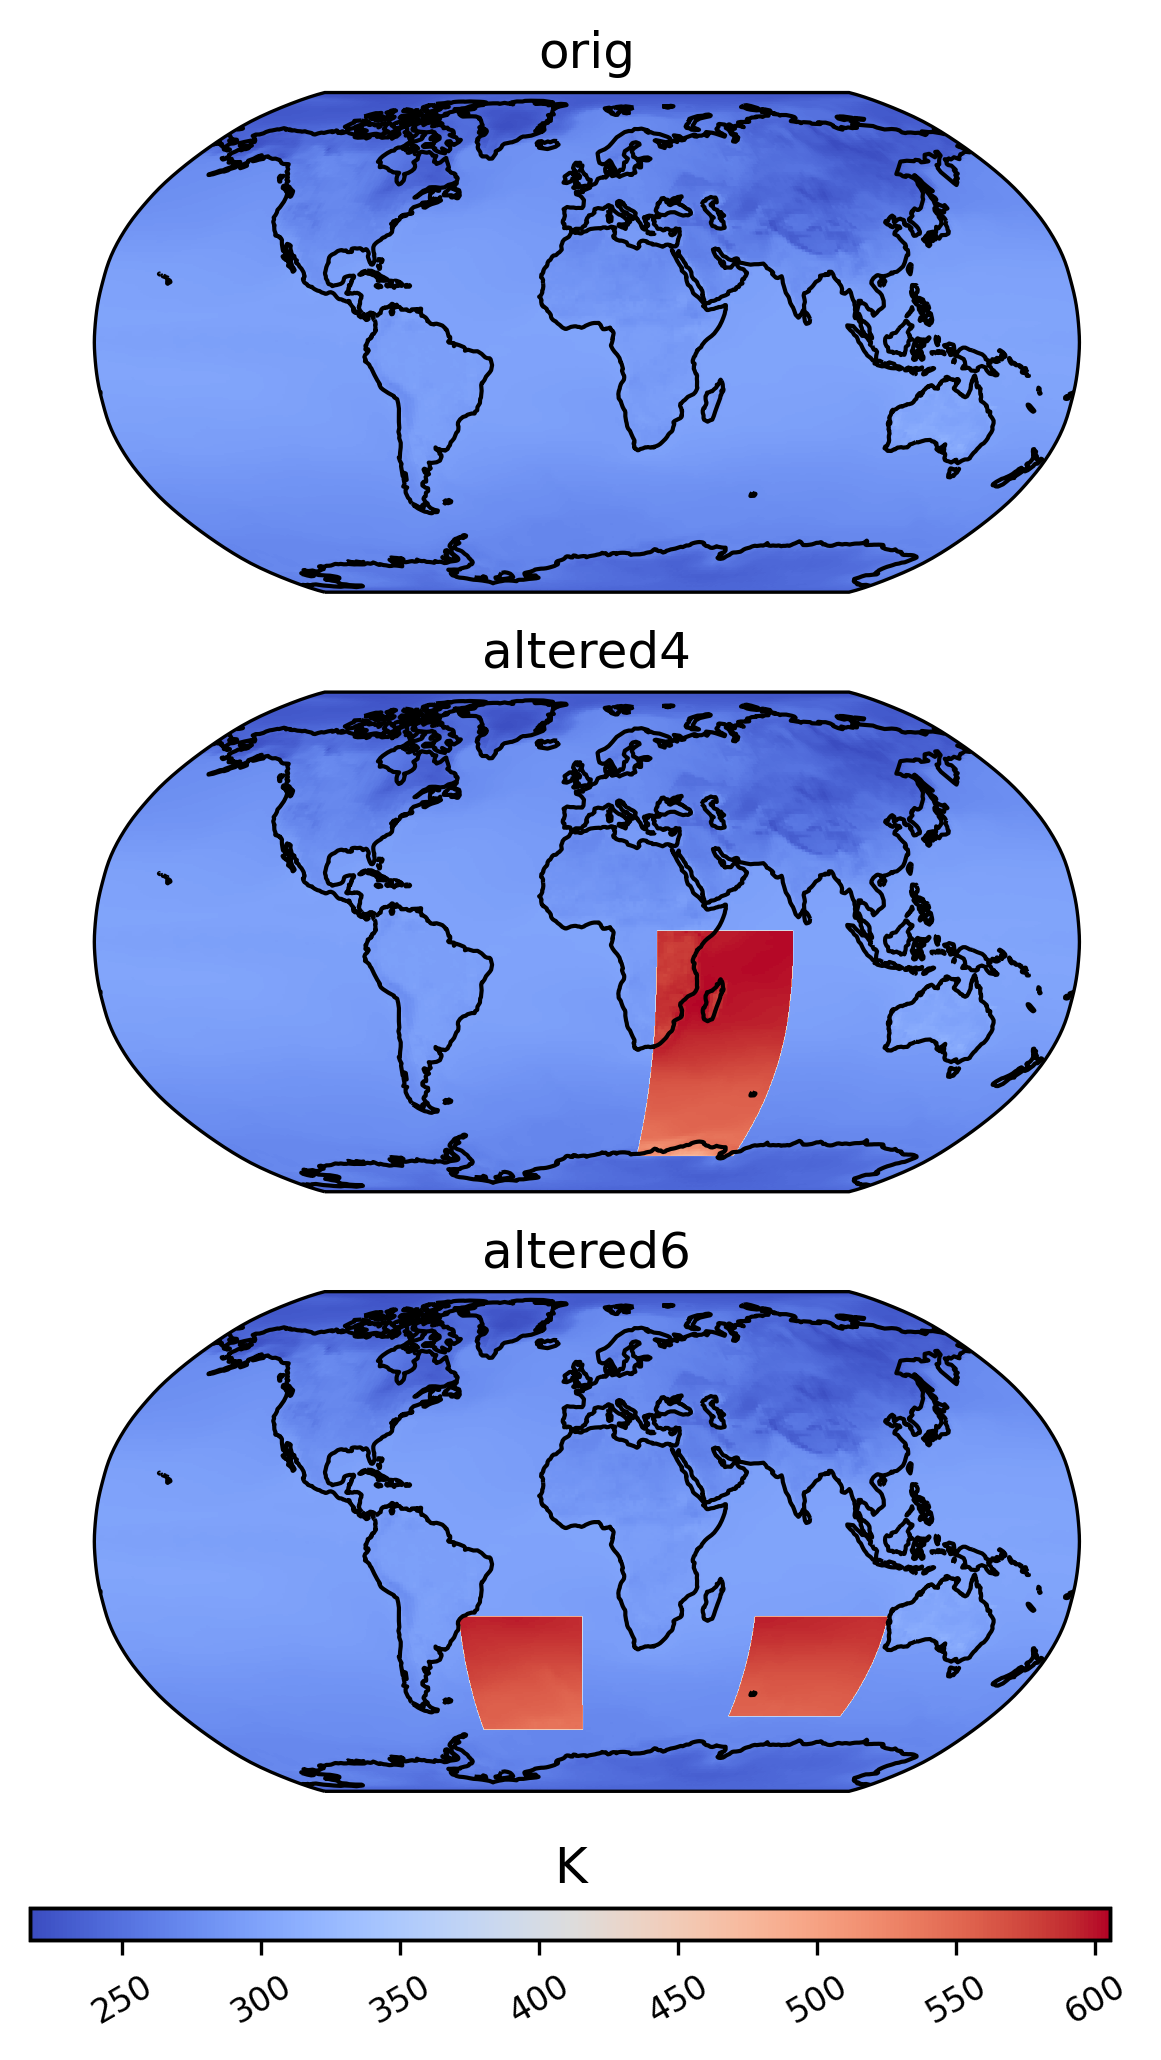

In [31]:
# without weighted means
ldcpy.compare_stats(altered_ds, "TS", ["orig", "altered5"], significant_digits=6, weighted=False)

ldcpy.plot(altered_ds, "TS", sets=["orig",  "altered4",  "altered6"], calc="mean", weighted=False, vert_plot=True, short_title=True)

# Type Conversion Comparison (Visuals and Metrics)


In [239]:
import xarray as xr
import numpy as np
import dask
da = ds.sel(collection="orig")["TS"]

point_altered_da = da.astype(np.double)
point_altered_da2 = da.astype(np.float16)
point_altered_da3 = da.astype(np.short)
point_altered_da4 = da.astype(np.ushort)



da = ds.sel(collection="orig")
altered_ds = ldcpy.collect_datasets("cam-fv", ["TS"],
                       [da, point_altered_da.to_dataset(), point_altered_da2.to_dataset(),
                       point_altered_da3.to_dataset(), point_altered_da4.to_dataset(),],
                                  ["orig", "altered", "altered2", "altered3", "altered4"])
altered_ds.attrs["file_size"] = None


dataset size in GB 0.22



Warning - this data set has a time dimension - examining slice 0 only...


orig   altered  altered2   altered3  \
mean                           274.714   274.714   274.714    274.212   
variance                       534.006   534.006       534    534.168   
standard deviation             23.1088   23.1088   23.1087    23.1123   
min value                      216.741   216.741    216.75        216   
max value                      315.584   315.584     315.5        315   
probability positive                 1         1         1          1   
number of zeros                      0         0         0          0   
spatial autocorr - latitude   0.993918  0.993918   0.99391   0.993758   
spatial autocorr - longitude  0.996801  0.996801  0.996793   0.996677   
entropy estimate              0.414723  0.414723  0.109339  0.0564327   

                               altered4  
mean                            274.212  
variance                        534.168  
standard deviation              23.1123  
min value                           216  
max value                           315  
probability positive                  1  
number of zeros                       0  
spatial autocorr - latitude    0.993758  
spatial autocorr - longitude   0.996677  
entropy estimate              0.0564327

altered     altered2     altered3  \
max abs diff                             0        0.125     0.999985   
min abs diff                             0            0  6.10352e-05   
mean abs diff                            0    0.0550531       0.5013   
mean squared diff                        0  4.48983e-08     0.251302   
root mean squared diff                   0    0.0653734     0.579266   
normalized root mean squared diff        0  0.000661388   0.00586048   
normalized max pointwise error           0   0.00126463    0.0101169   
pearson correlation coefficient          1     0.999996     0.999921   
ks p-value                               1     0.352438  2.90692e-39   
spatial relative error(% > 0.0001)       0      73.6762      97.2313   
max spatial relative error               0  0.000485787   0.00457886   
data SSIM                                1     0.976387     0.920831   

                                       altered4  
max abs diff                           0.999985  
min abs diff                        6.10352e-05  
mean abs diff                            0.5013  
mean squared diff                      0.251302  
root mean squared diff                 0.579266  
normalized root mean squared diff    0.00586048  
normalized max pointwise error        0.0101169  
pearson correlation coefficient        0.999921  
ks p-value                          2.90692e-39  
spatial relative error(% > 0.0001)      97.2313  
max spatial relative error           0.00457886  
data SSIM                              0.920831

274.99505609250735
274.99505609250735
274.9950442391855
274.49455186631945
274.49455186631945


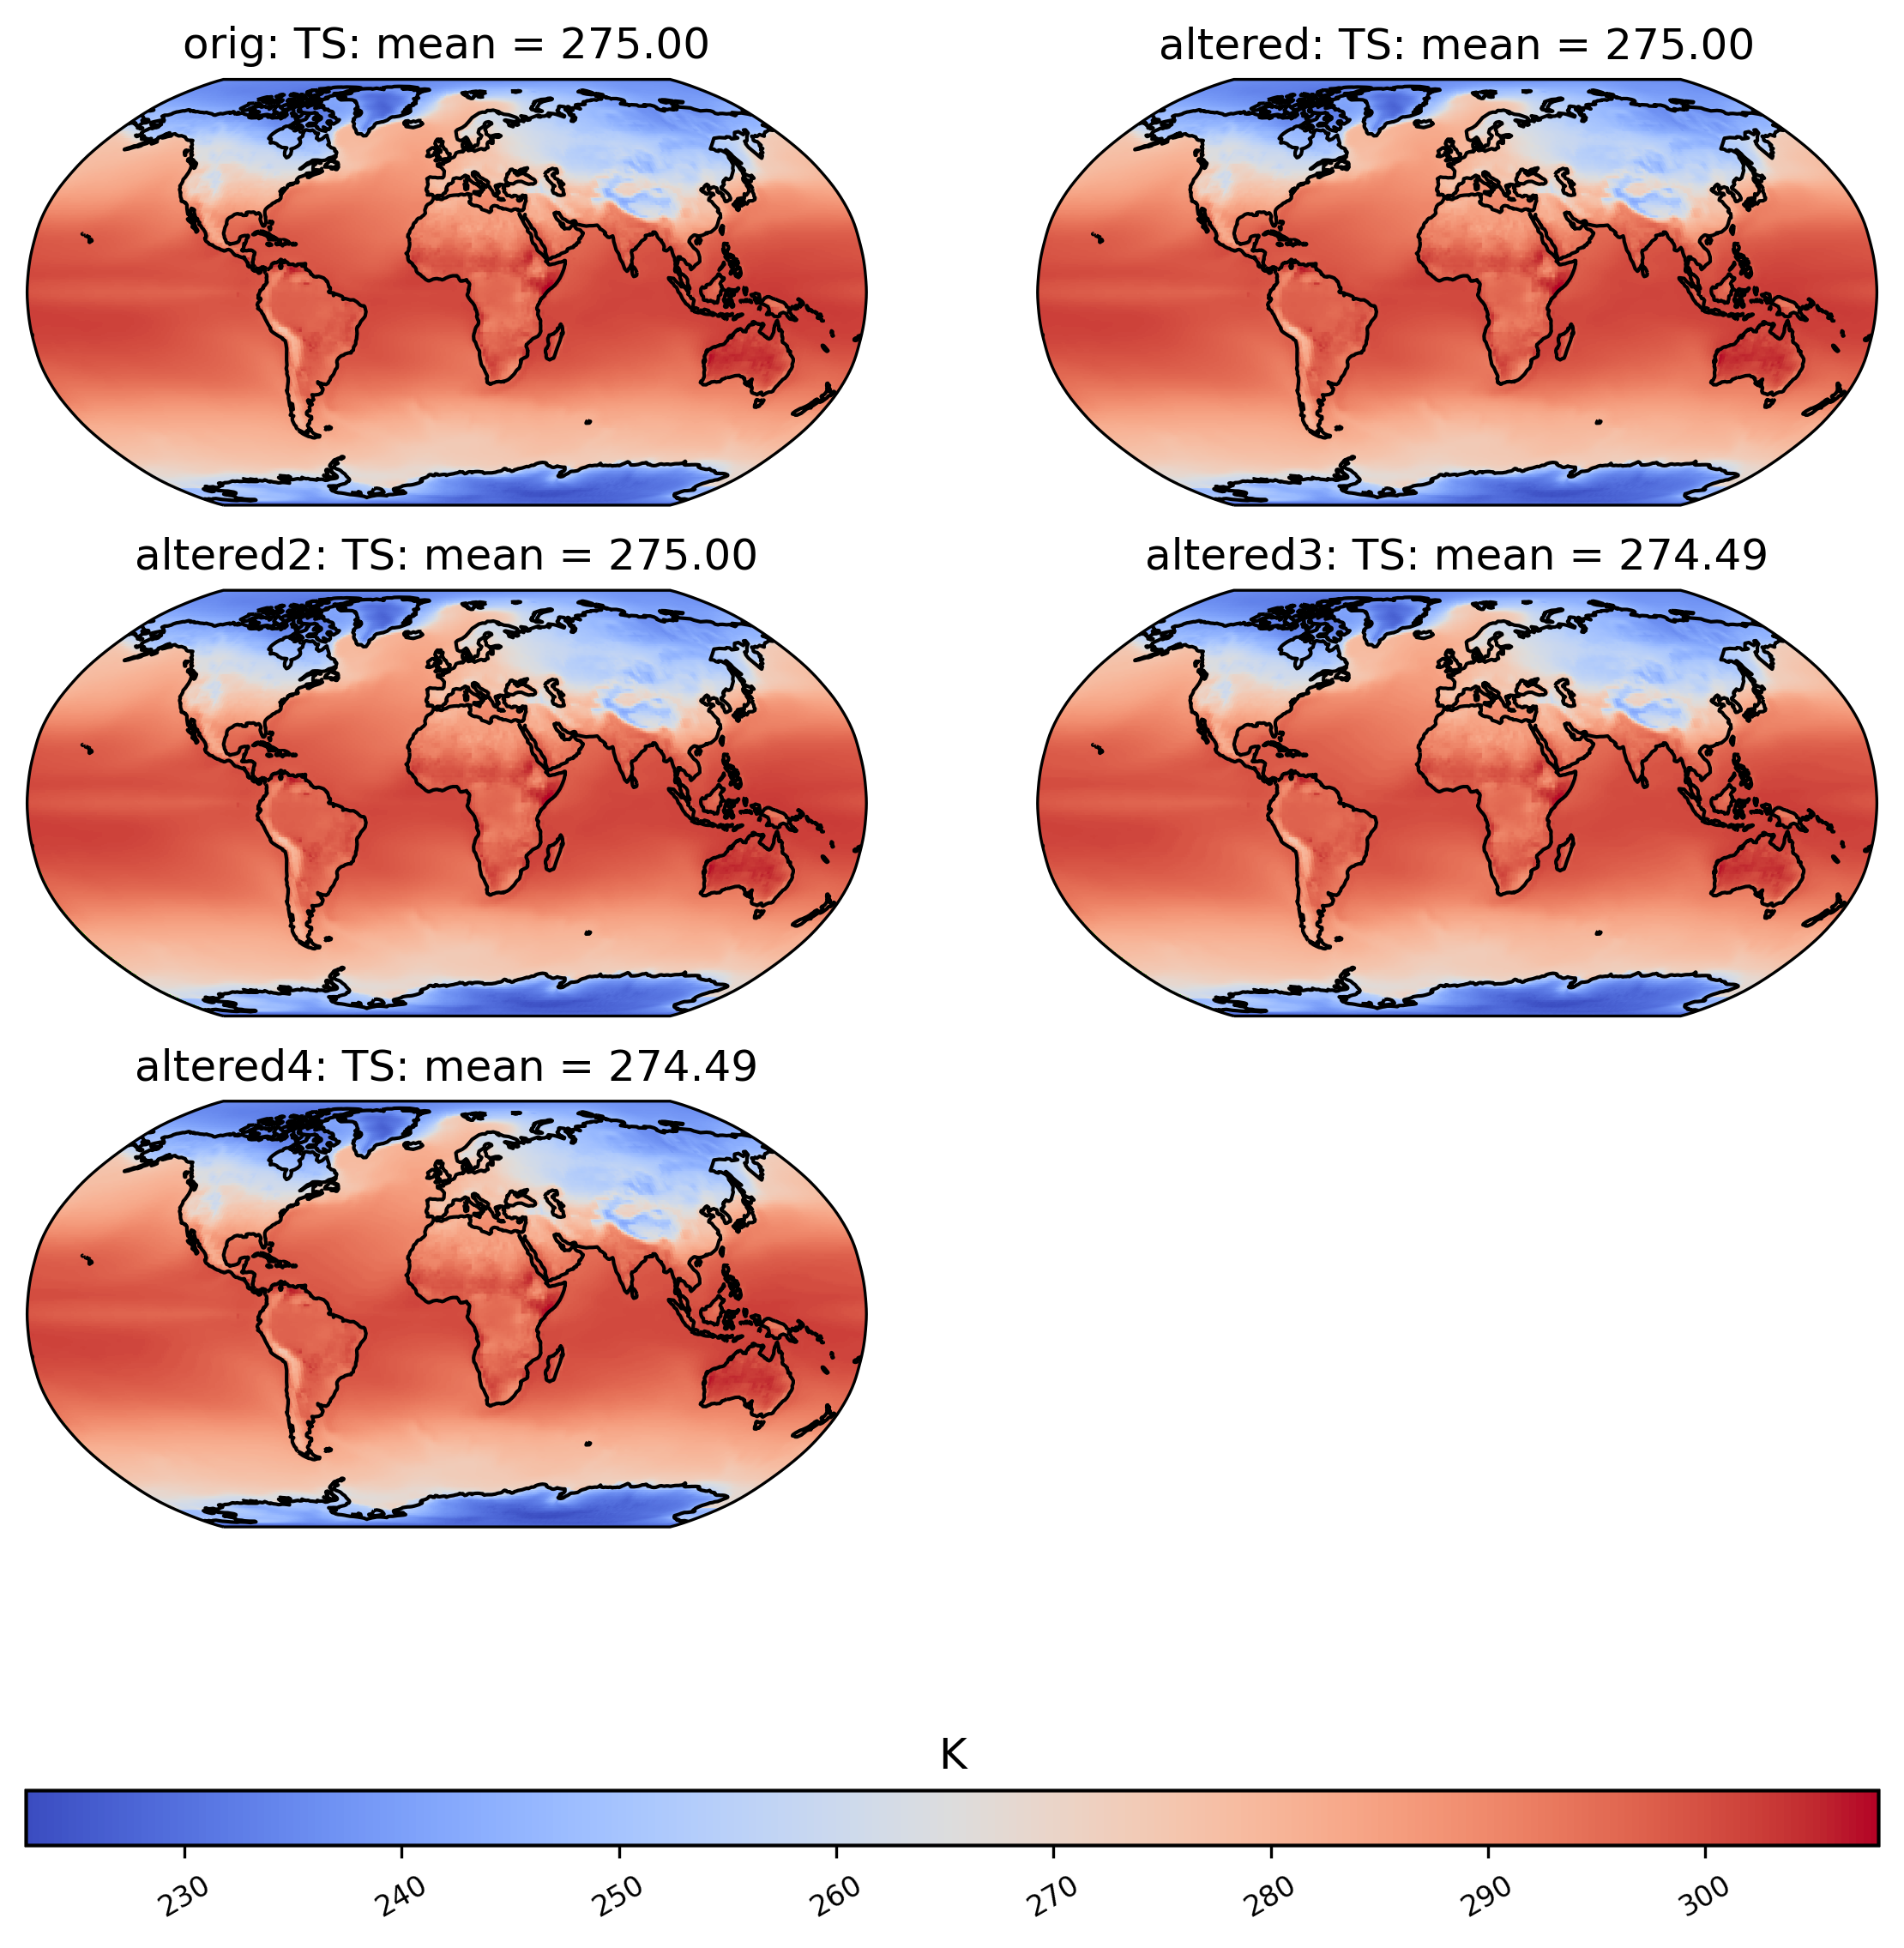

In [240]:
# without weighted means
ldcpy.compare_stats(altered_ds, "TS", ["orig", "altered", "altered2", "altered3", "altered4"], significant_digits=6, weighted=False)

ldcpy.plot(altered_ds, "TS", sets=["orig", "altered", "altered2", "altered3", "altered4"], calc="mean", weighted=False)

# Round to Zero Comparison (Visuals and Metrics)

In [247]:
import xarray as xr
import numpy as np
import dask
import dask.array as da

d = ds.sel(collection="orig")["TS"]

point_altered_da = d.copy().load()
#point_altered_da[da.where(point_altered_da < 0.001)] = 0

point_altered_da2 = d.copy().load()
point_altered_da2[da.where(point_altered_da2 < np.min(point_altered_da2.values) * 1.005)] = 0


d = ds.sel(collection="orig")
altered_ds = ldcpy.collect_datasets("cam-fv", ["TS"],
                       [d, point_altered_da.to_dataset(), point_altered_da2.to_dataset()],
                                  ["orig", "altered", "altered2"])
altered_ds.attrs["file_size"] = None


dataset size in GB 0.00



Warning - this data set has a time dimension - examining slice 0 only...


orig   altered  altered2
mean                           274.714   274.714   274.706
variance                       534.006   534.006   536.616
standard deviation             23.1088   23.1088   23.1652
min value                      216.741   216.741         0
max value                      315.584   315.584   315.584
probability positive                 1         1  0.999964
number of zeros                      0         0         2
spatial autocorr - latitude   0.993918  0.993918  0.992282
spatial autocorr - longitude  0.996801  0.996801  0.993591
entropy estimate              0.414723  0.414723  0.414727

altered     altered2
max abs diff                             0      217.575
min abs diff                             0            0
mean abs diff                            0   0.00785438
mean squared diff                        0  6.16912e-05
root mean squared diff                   0        1.306
normalized root mean squared diff        0    0.0132129
normalized max pointwise error           0      2.20122
pearson correlation coefficient          1      0.99841
ks p-value                               1            1
spatial relative error(% > 0.0001)       0    0.0036169
max spatial relative error               0            1
data SSIM                                1     0.998591

274.7137027669836
274.7137027669836
274.7058483905814


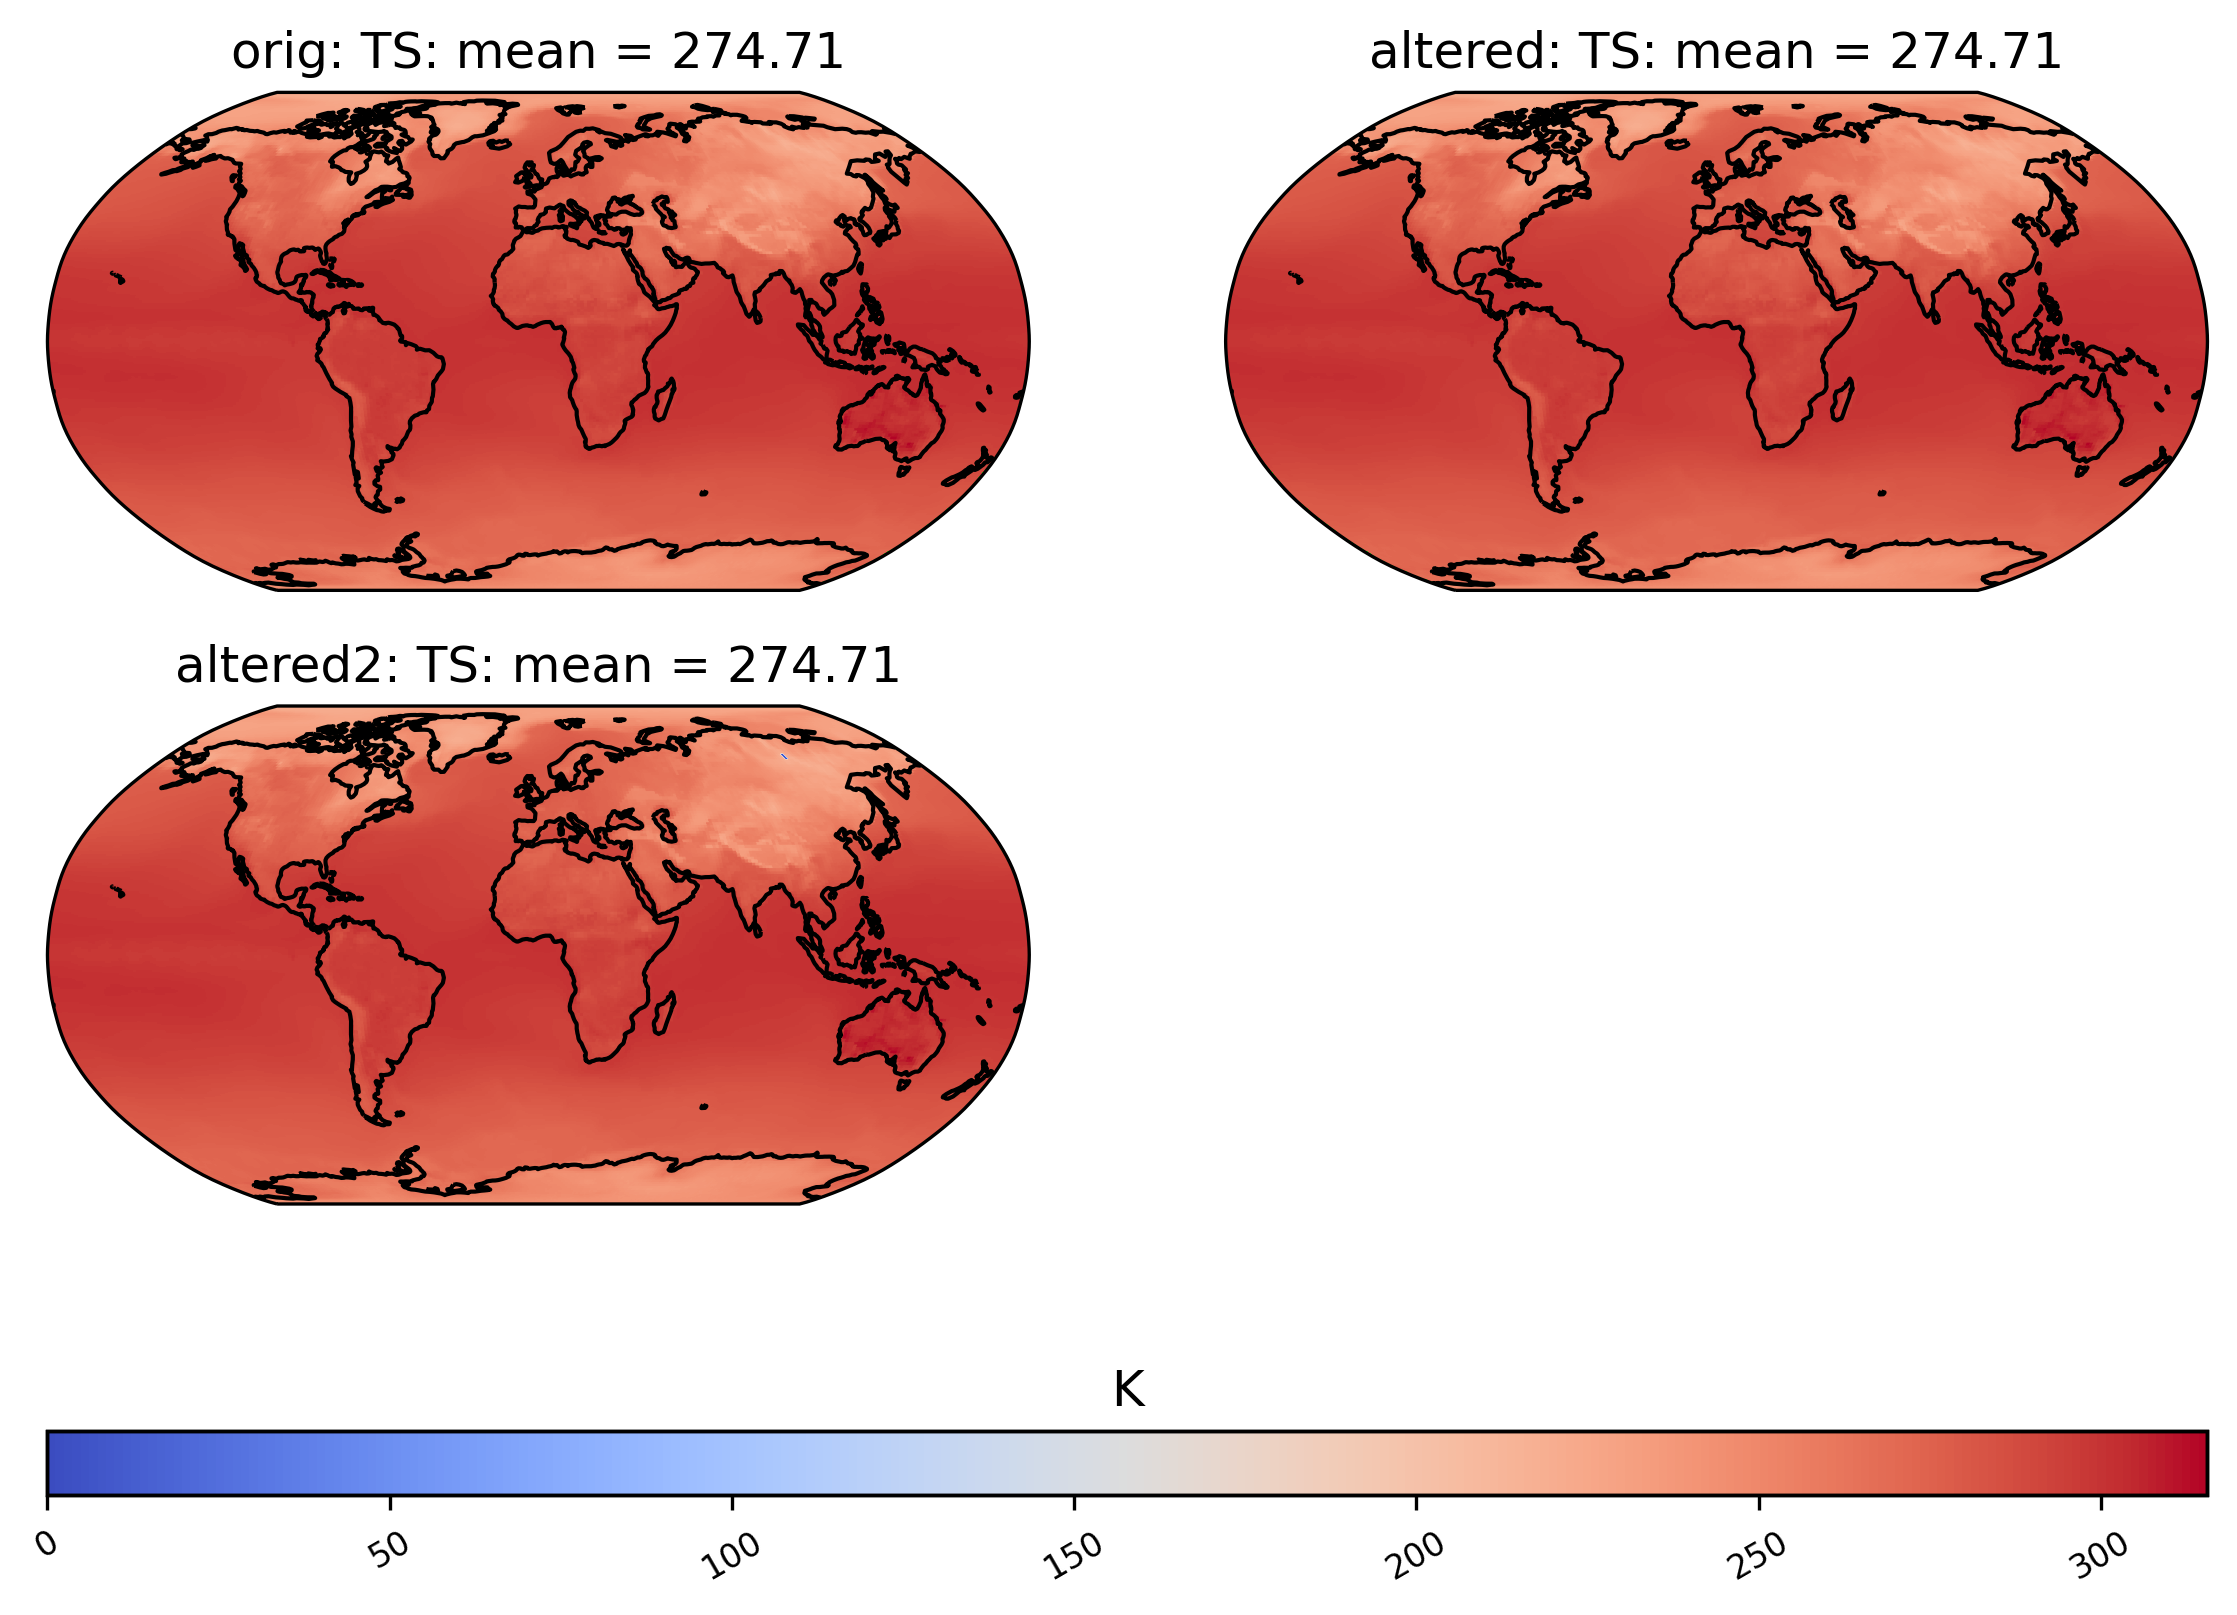

In [245]:
# without weighted means
ldcpy.compare_stats(altered_ds, "TS", ["orig", "altered", "altered2"], significant_digits=6, weighted=False)

ldcpy.plot(altered_ds, "TS", sets=["orig", "altered", "altered2"], calc="mean", weighted=False)